In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud
from scipy.stats import chi2_contingency

In [2]:
reddit_comments = pd.read_csv('/{add directory}/Final_Dataset.csv', low_memory=False)

# General Distributions the Dataset

## Emotion Distribution

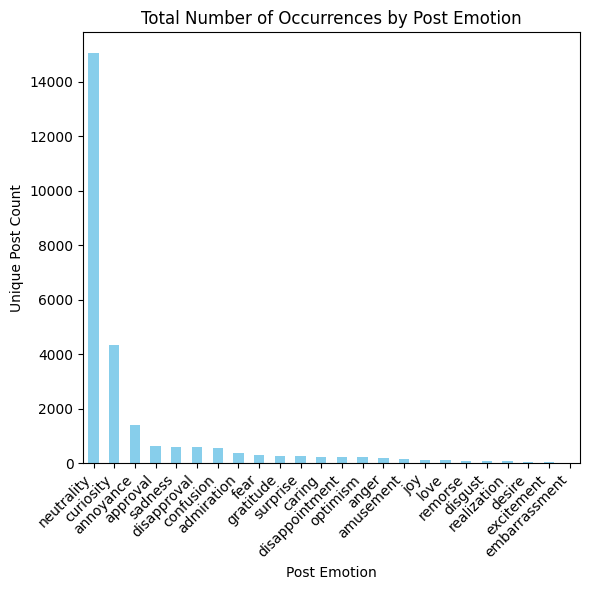

In [65]:
# Group by post_id and extract the unique post_emotion
unique_post_emotion_counts = reddit_comments.groupby('post_id')['post_emotion'].first().value_counts()

# Plot the total number of occurrences by post emotion in a bar chart
plt.figure(figsize=(6, 6))
unique_post_emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Total Number of Occurrences by Post Emotion')
plt.xlabel('Post Emotion')
plt.ylabel('Unique Post Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


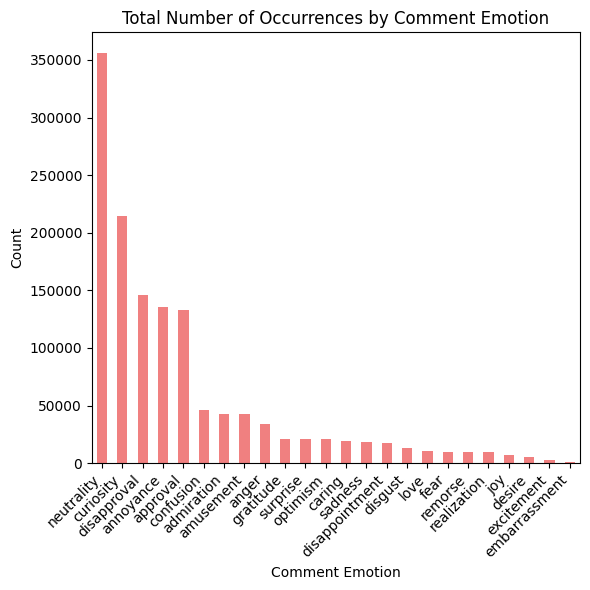

In [66]:
# Count the occurrences of each comment emotion
comment_emotion_counts = reddit_comments['comment_emotion'].value_counts()

# Plot the total number of occurrences by comment emotion in a bar chart
plt.figure(figsize=(6, 6))
comment_emotion_counts.plot(kind='bar', color='lightcoral')
plt.title('Total Number of Occurrences by Comment Emotion')
plt.xlabel('Comment Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Media Category and Sub-Category Ditribution

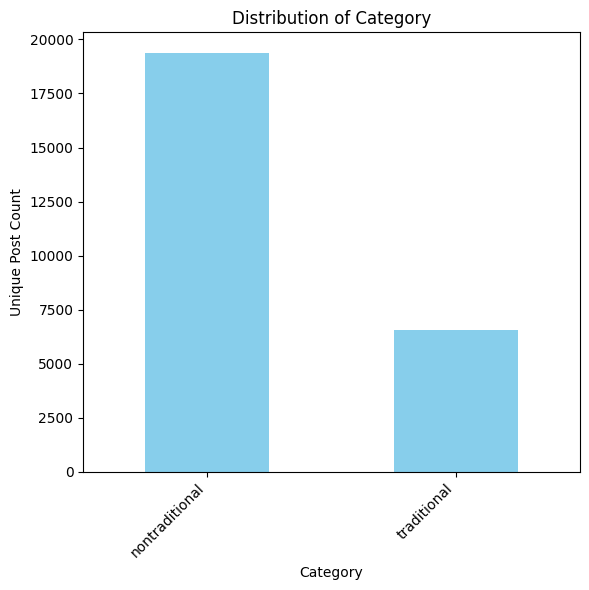

In [54]:
# Group by category and count the posts
unique_post_id_by_category = reddit_comments.groupby('category')['post_id'].nunique()

# Plot the distribution of posts by category
plt.figure(figsize=(6, 6))
unique_post_id_by_category.plot(kind='bar', color='skyblue')
plt.title('Distribution of Category')
plt.xlabel('Category')
plt.ylabel('Unique Post Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


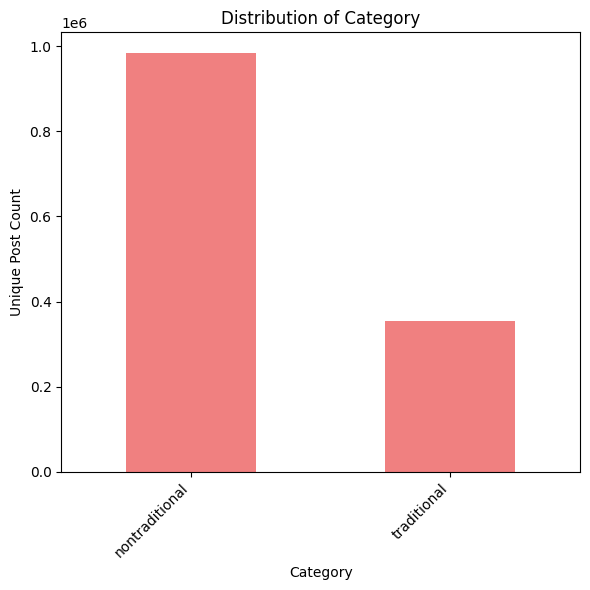

In [57]:
# Group by category and count the comments
unique_post_id_by_category = reddit_comments.groupby('category')['comment_id'].nunique()

# Plot the distribution of comments by category
plt.figure(figsize=(6, 6))
unique_post_id_by_category.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Category')
plt.xlabel('Category')
plt.ylabel('Unique Post Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


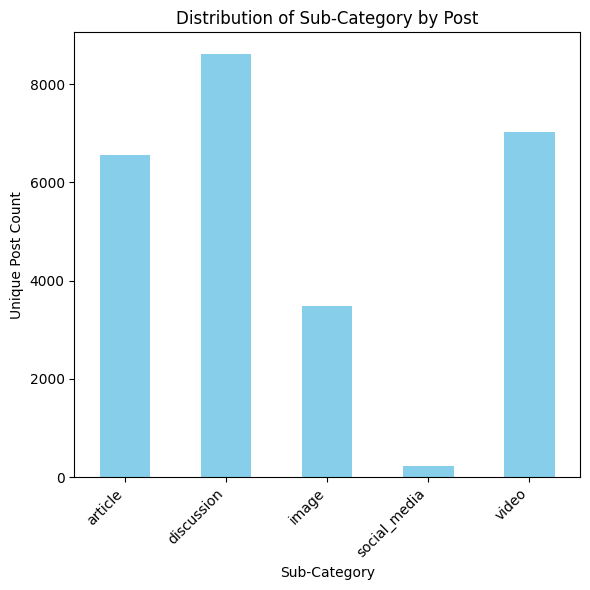

In [52]:
# Group by sub_category and count the posts
unique_post_id_by_sub_category = reddit_comments.groupby('sub_category')['post_id'].nunique()

# Plot the distribution of post by sub_category
plt.figure(figsize=(6, 6))
unique_post_id_by_sub_category.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sub-Category by Post')
plt.xlabel('Sub-Category')
plt.ylabel('Unique Post Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


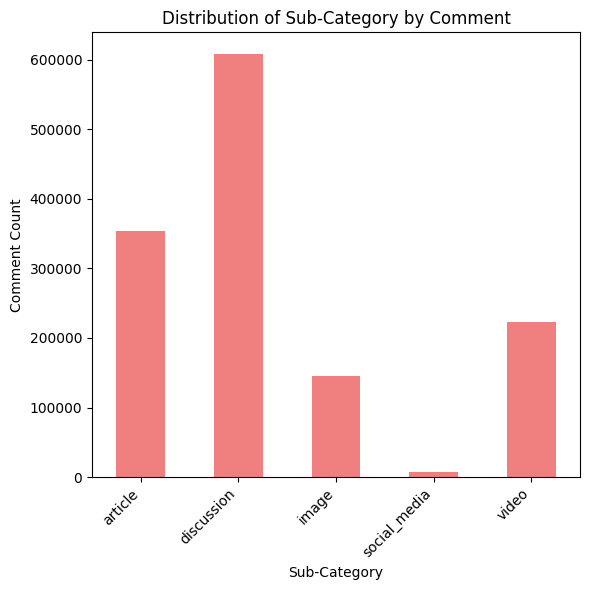

In [53]:
# Group by 'sub_category' and count the comments
unique_post_id_by_sub_category = reddit_comments.groupby('sub_category')['comment_id'].nunique()

# Plot the distribution of comment by sub_category
plt.figure(figsize=(6, 6))
unique_post_id_by_sub_category.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Sub-Category by Comment')
plt.xlabel('Sub-Category')
plt.ylabel('Comment Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Subreddit Distribution

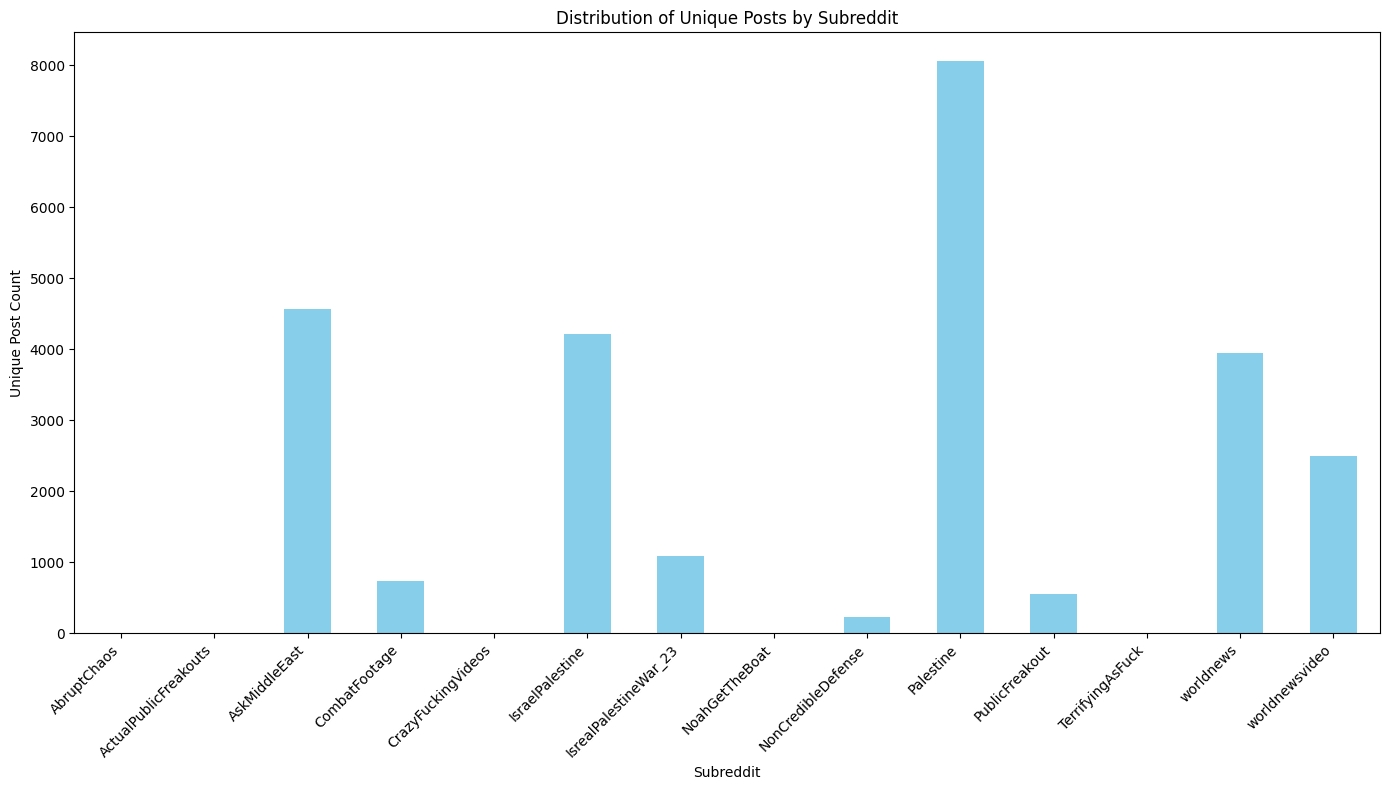

In [36]:
# Group by subreddit and count the posts
unique_post_id_by_subreddit = reddit_comments.groupby('subreddit')['post_id'].nunique()

# Plot the distribution of posts by subreddit
plt.figure(figsize=(14, 8))
unique_post_id_by_subreddit.plot(kind='bar', color='skyblue')
plt.title('Distribution of Unique Posts by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Unique Post Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


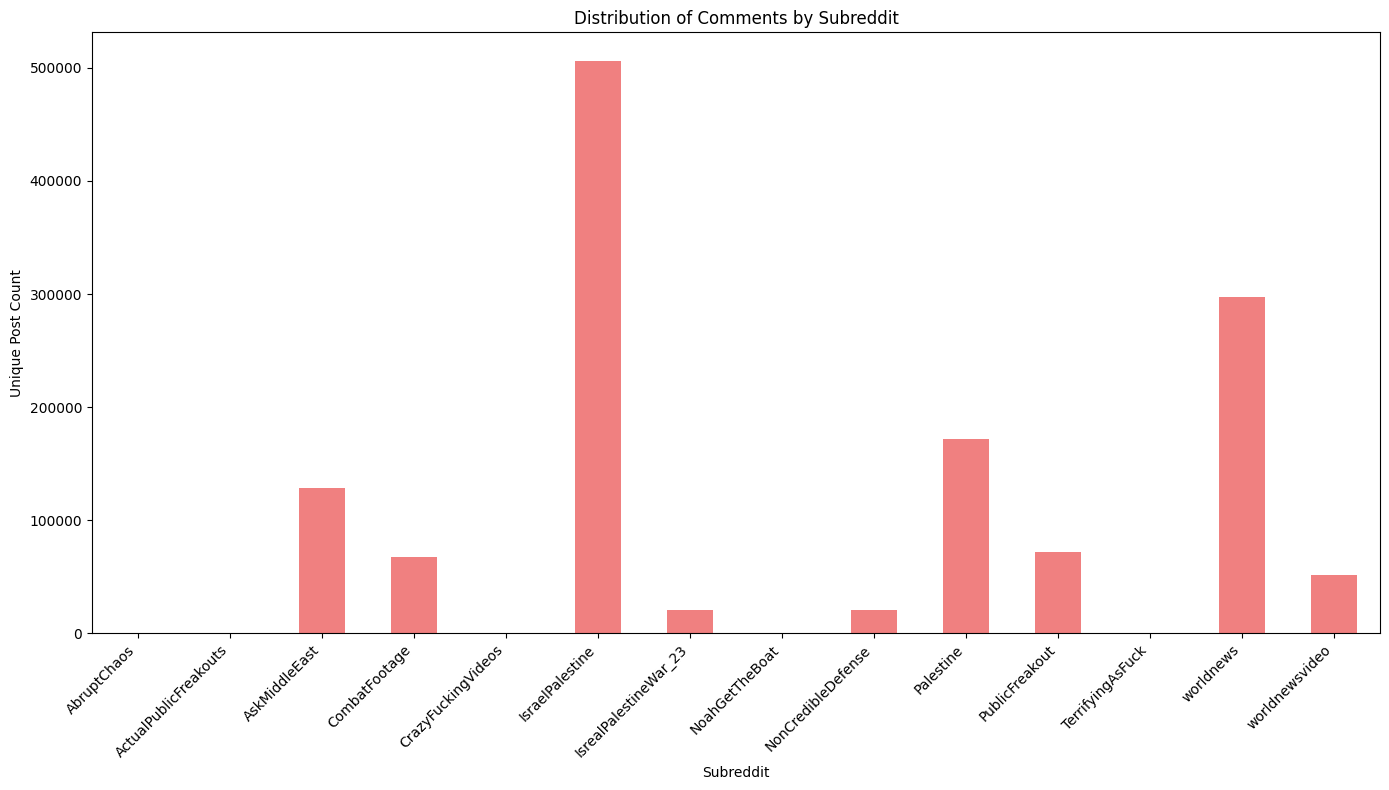

In [40]:
# Group by 'subreddit' and count the comments
unique_comment_id_by_subreddit = reddit_comments.groupby('subreddit')['comment_id'].nunique()

# Plot the distribution of comments by subreddit
plt.figure(figsize=(14, 8))
unique_comment_id_by_subreddit.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Comments by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Unique Post Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


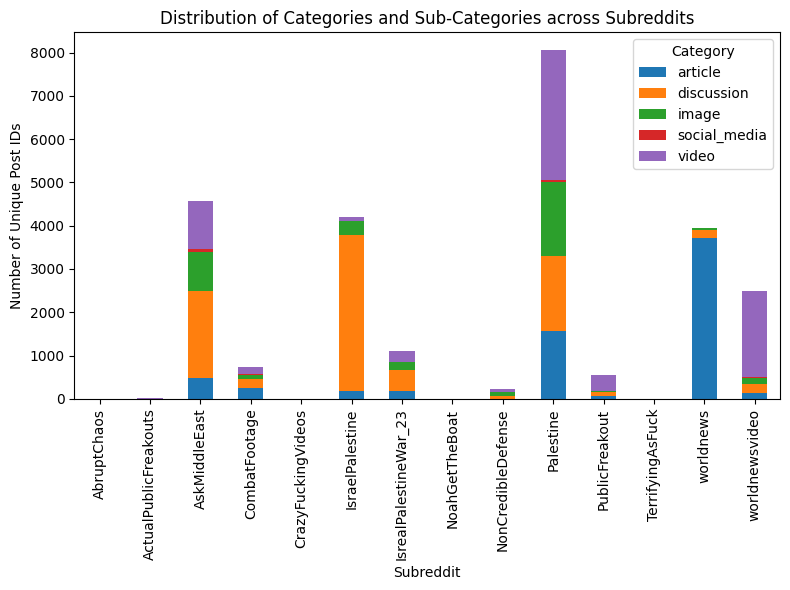

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by subreddit, category, and sub_category, counting unique post_id
category_distribution = reddit_comments.groupby(['subreddit', 'category', 'sub_category'])['post_id'].nunique().reset_index()

# Rename the count column for clarity
category_distribution.rename(columns={'post_id': 'post_count'}, inplace=True)

# Create a bar chart for the distribution of category and sub_category
plt.figure(figsize=(8, 6))
category_distribution_pivot = category_distribution.pivot_table(index='subreddit', columns='sub_category', values='post_count', aggfunc='sum', fill_value=0)
category_distribution_pivot.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Distribution of Categories and Sub-Categories across Subreddits')
plt.xlabel('Subreddit')
plt.ylabel('Number of Unique Post IDs')
plt.legend(title='Category')
plt.tight_layout()
plt.show()


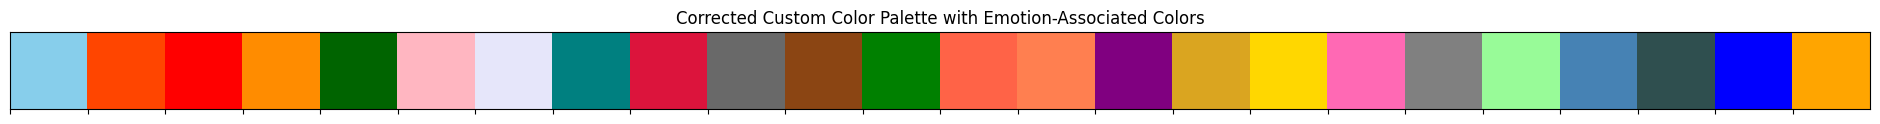

In [13]:
# Map colors to emotions for clarity
emotion_color_mapping = {
    "admiration": "#87CEEB",    # Light Blue
    "amusement": "#FF4500",     # OrangeRed
    "anger": "#FF0000",         # Red
    "annoyance": "#FF8C00",     # Dark Orange
    "approval": "#006400",      # Dark Green
    "caring": "#FFB6C1",        # Light Pink
    "confusion": "#E6E6FA",     # Lavender
    "curiosity": "#008080",     # Teal
    "desire": "#DC143C",        # Crimson
    "disappointment": "#696969",# Dim Gray
    "disapproval": "#8B4513",   # Saddle Brown
    "disgust": "#008000",       # Green
    "embarrassment": "#FF6347", # Tomato
    "excitement": "#FF7F50",    # Coral
    "fear": "#800080",          # Purple
    "gratitude": "#DAA520",     # Golden Rod
    "joy": "#FFD700",           # Yellow
    "love": "#FF69B4",          # Pink
    "neutrality": "#808080",    # Gray
    "optimism": "#98FB98",      # Pale Green
    "realization": "#4682B4",   # Steel Blue
    "remorse": "#2F4F4F",       # Dark Slate Gray
    "sadness": "#0000FF",       # Blue
    "surprise": "#FFA500",      # Orange
}

# Get the unique emotions in the correct order
emotions_in_data = [
    "admiration", "amusement", "anger", "annoyance", "approval",
    "caring", "confusion", "curiosity", "desire", "disappointment",
    "disapproval", "disgust", "embarrassment", "excitement", "fear",
    "gratitude", "joy", "love", "neutrality", "optimism",
    "realization", "remorse", "sadness", "surprise"
]

# Generate the custom palette based on the corrected order of emotions
custom_palette = [emotion_color_mapping[emotion] for emotion in emotions_in_data]

# visualize the palette to ensure it looks good
sns.palplot(custom_palette)
plt.title("Corrected Custom Color Palette with Emotion-Associated Colors")
plt.show()



# Word Cloud

## For All Comments

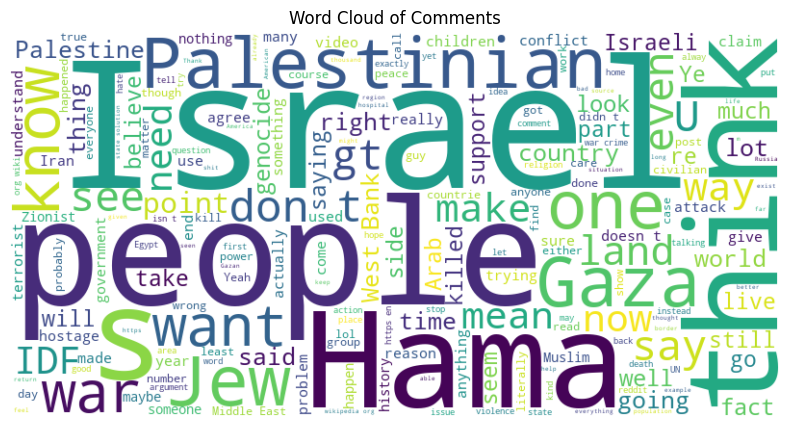

In [216]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all comments into a single string
all_comments_text = ' '.join(reddit_comments['self_text'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()


## For All Posts

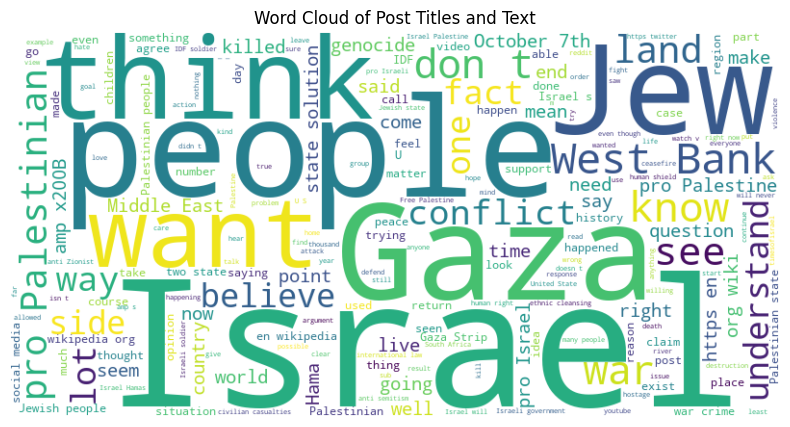

In [222]:
# Combine post titles and post text into a single string
reddit_comments['post_text_combined'] = reddit_comments[['post_title', 'post_self_text']].fillna('').agg(' '.join, axis=1)
all_post_text = ' '.join(reddit_comments['post_text_combined'].dropna().astype(str))

# Generate the word cloud
wordcloud_post = WordCloud(width=800, height=400, background_color='white').generate(all_post_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_post, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Post Titles and Text')
plt.show()


# Emotions Across Media Types and Subreddits

<Figure size 800x800 with 0 Axes>

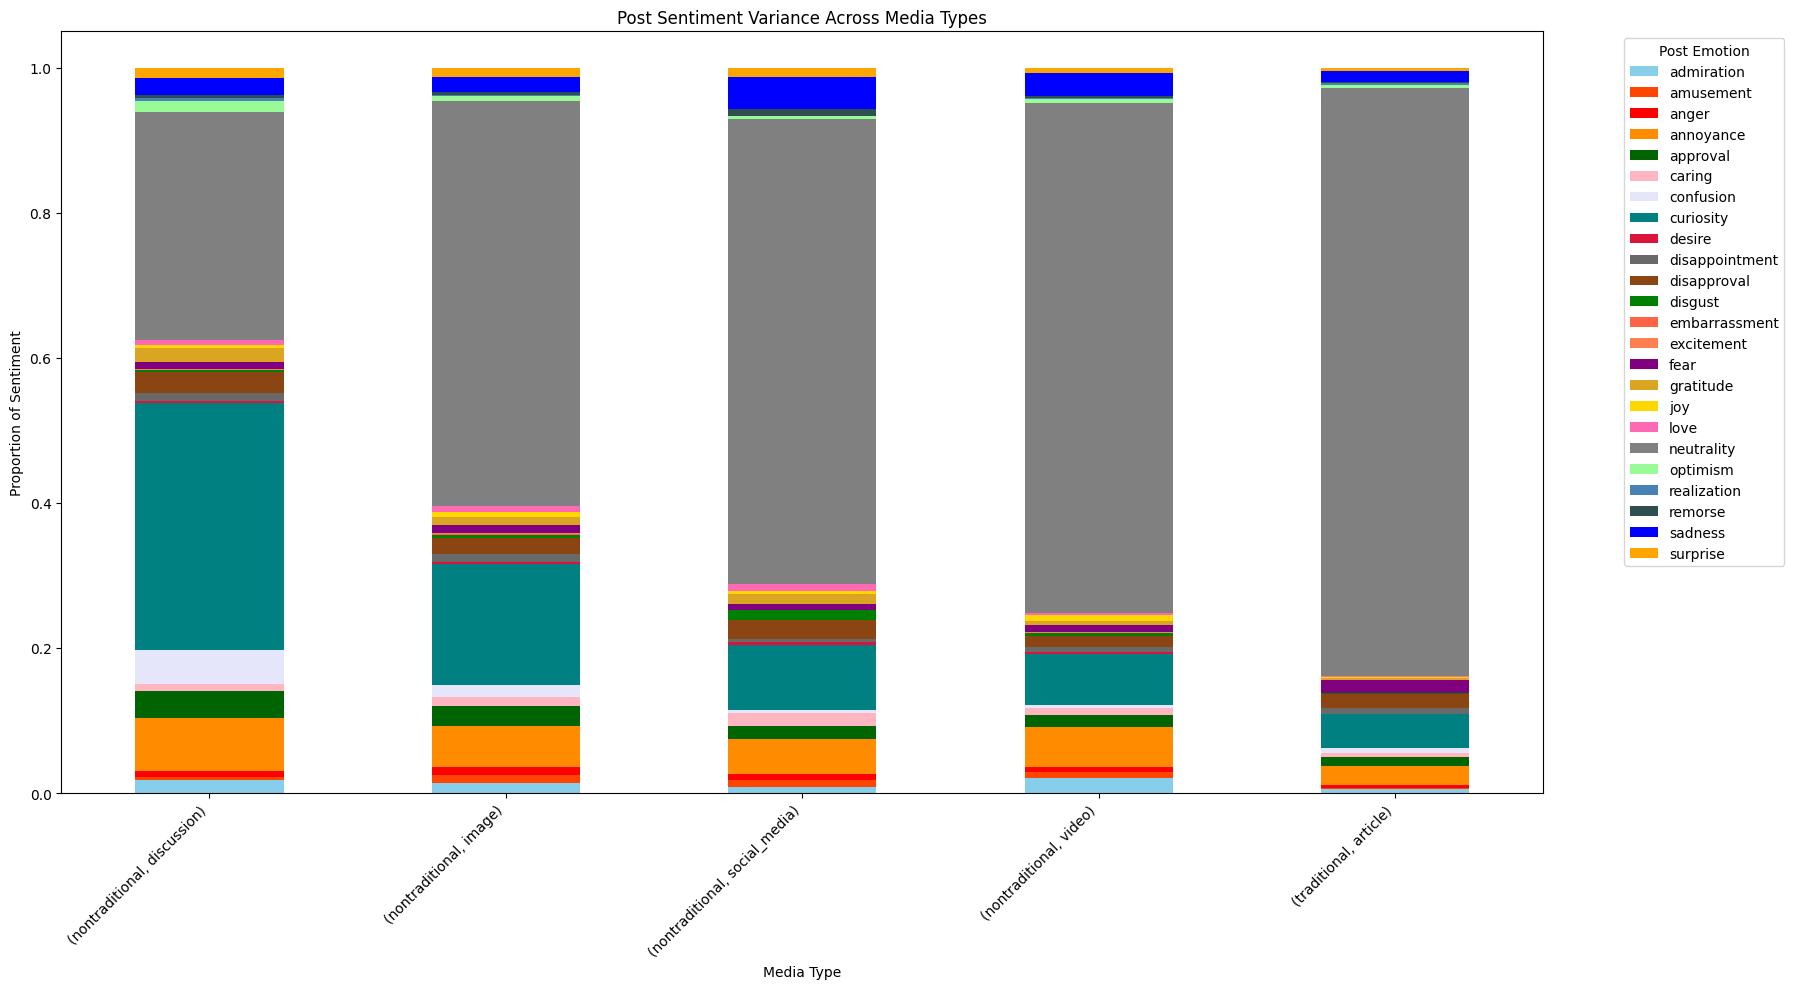

In [68]:
# Group by post_id and then extract the first occurrence of category, sub_category, and post_emotion
unique_posts = reddit_comments.groupby('post_id').agg({
    'category': 'first',
    'sub_category': 'first',
    'post_emotion': 'first'
})

# Group by media type (category and sub_category) and sentiment (post_emotion)
media_sentiment = unique_posts.groupby(['category', 'sub_category', 'post_emotion']).size().unstack(fill_value=0)

# Normalize to get proportions
media_sentiment = media_sentiment.apply(lambda x: x / x.sum(), axis=1)

# Plot sentiment variance across media types using the custom palette
plt.figure(figsize=(8, 8))  # Increased figure size
media_sentiment.plot(kind='bar', stacked=True, color=custom_palette, figsize=(18, 10))

plt.title('Post Sentiment Variance Across Media Types')
plt.ylabel('Proportion of Sentiment')
plt.xlabel('Media Type')
plt.xticks(rotation=45, ha='right')

# Move the legend outside the plot
plt.legend(title='Post Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1800x1000 with 0 Axes>

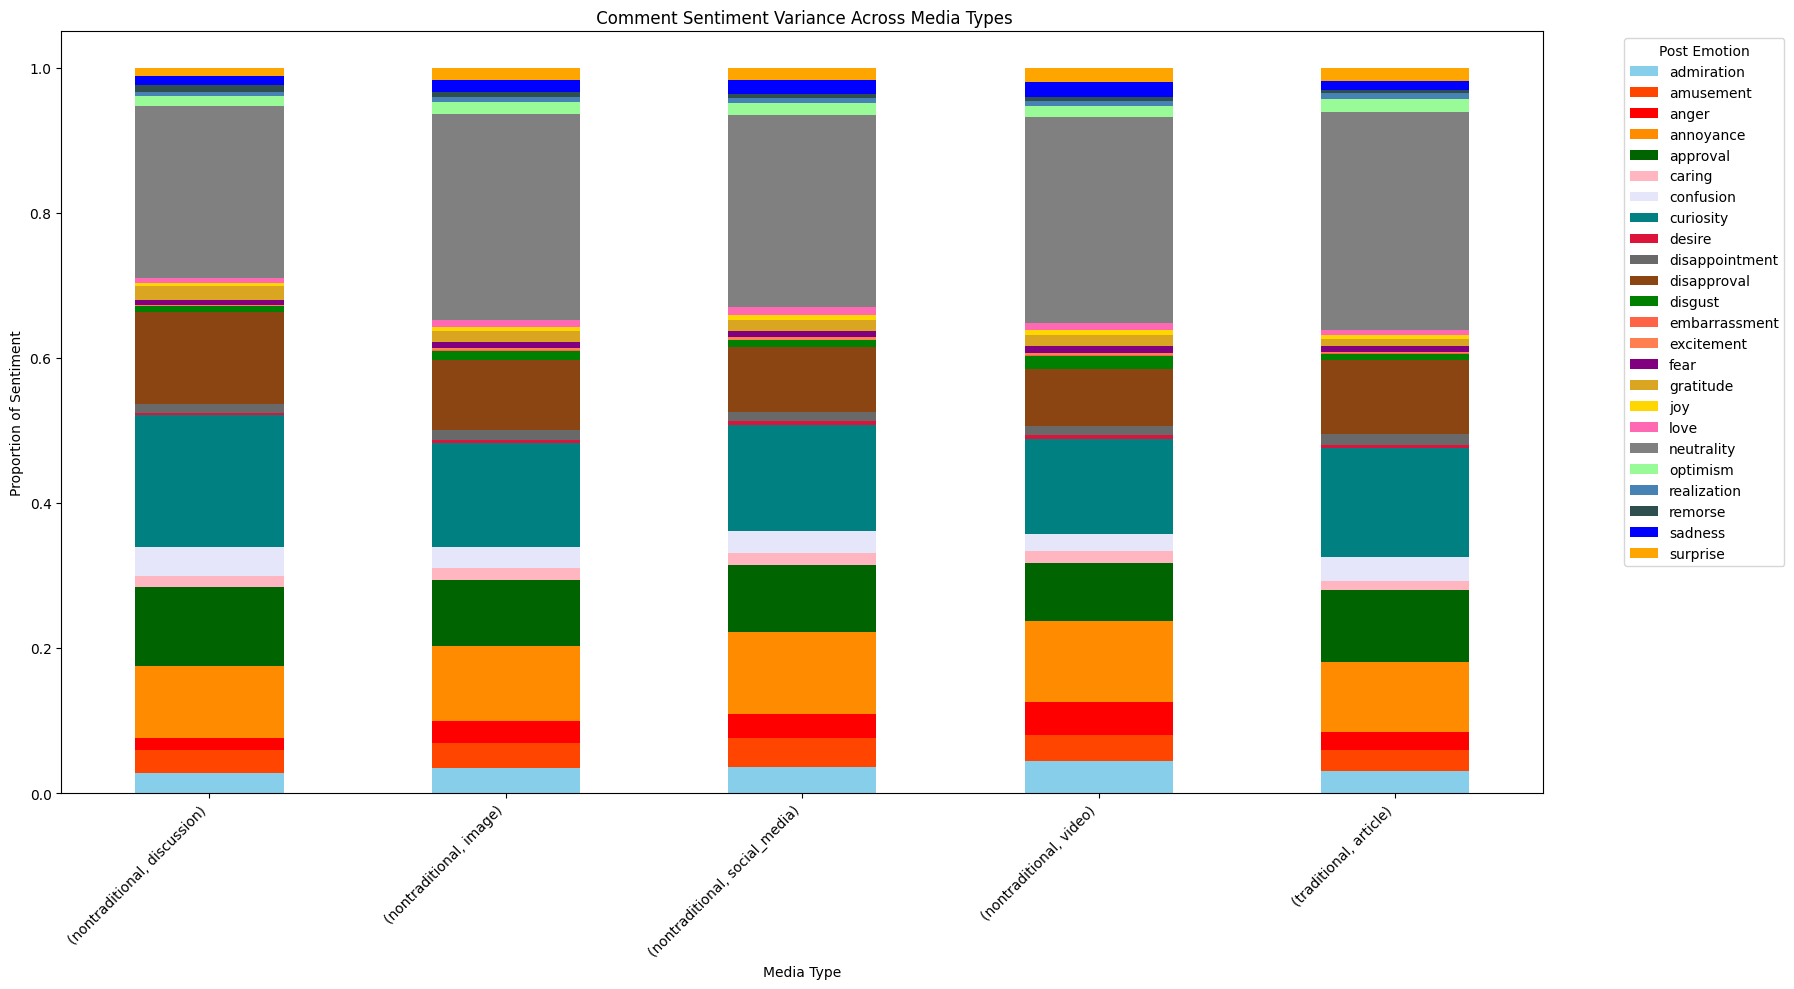

In [70]:
# Group by media type (category and sub_category) and sentiment (post_emotion)
media_sentiment = reddit_comments.groupby(['category', 'sub_category', 'comment_emotion']).size().unstack(fill_value=0)
media_sentiment = media_sentiment.apply(lambda x: x / x.sum(), axis=1)  # Normalize to get proportions

# Plot sentiment variance across media types using the custom palette
plt.figure(figsize=(18, 10))  # Increased figure size
media_sentiment.plot(kind='bar', stacked=True, color=custom_palette, figsize=(18, 10))

plt.title(' Comment Sentiment Variance Across Media Types')
plt.ylabel('Proportion of Sentiment')
plt.xlabel('Media Type')
plt.xticks(rotation=45, ha='right')

# Move the legend outside the plot
plt.legend(title='Post Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1800x1000 with 0 Axes>

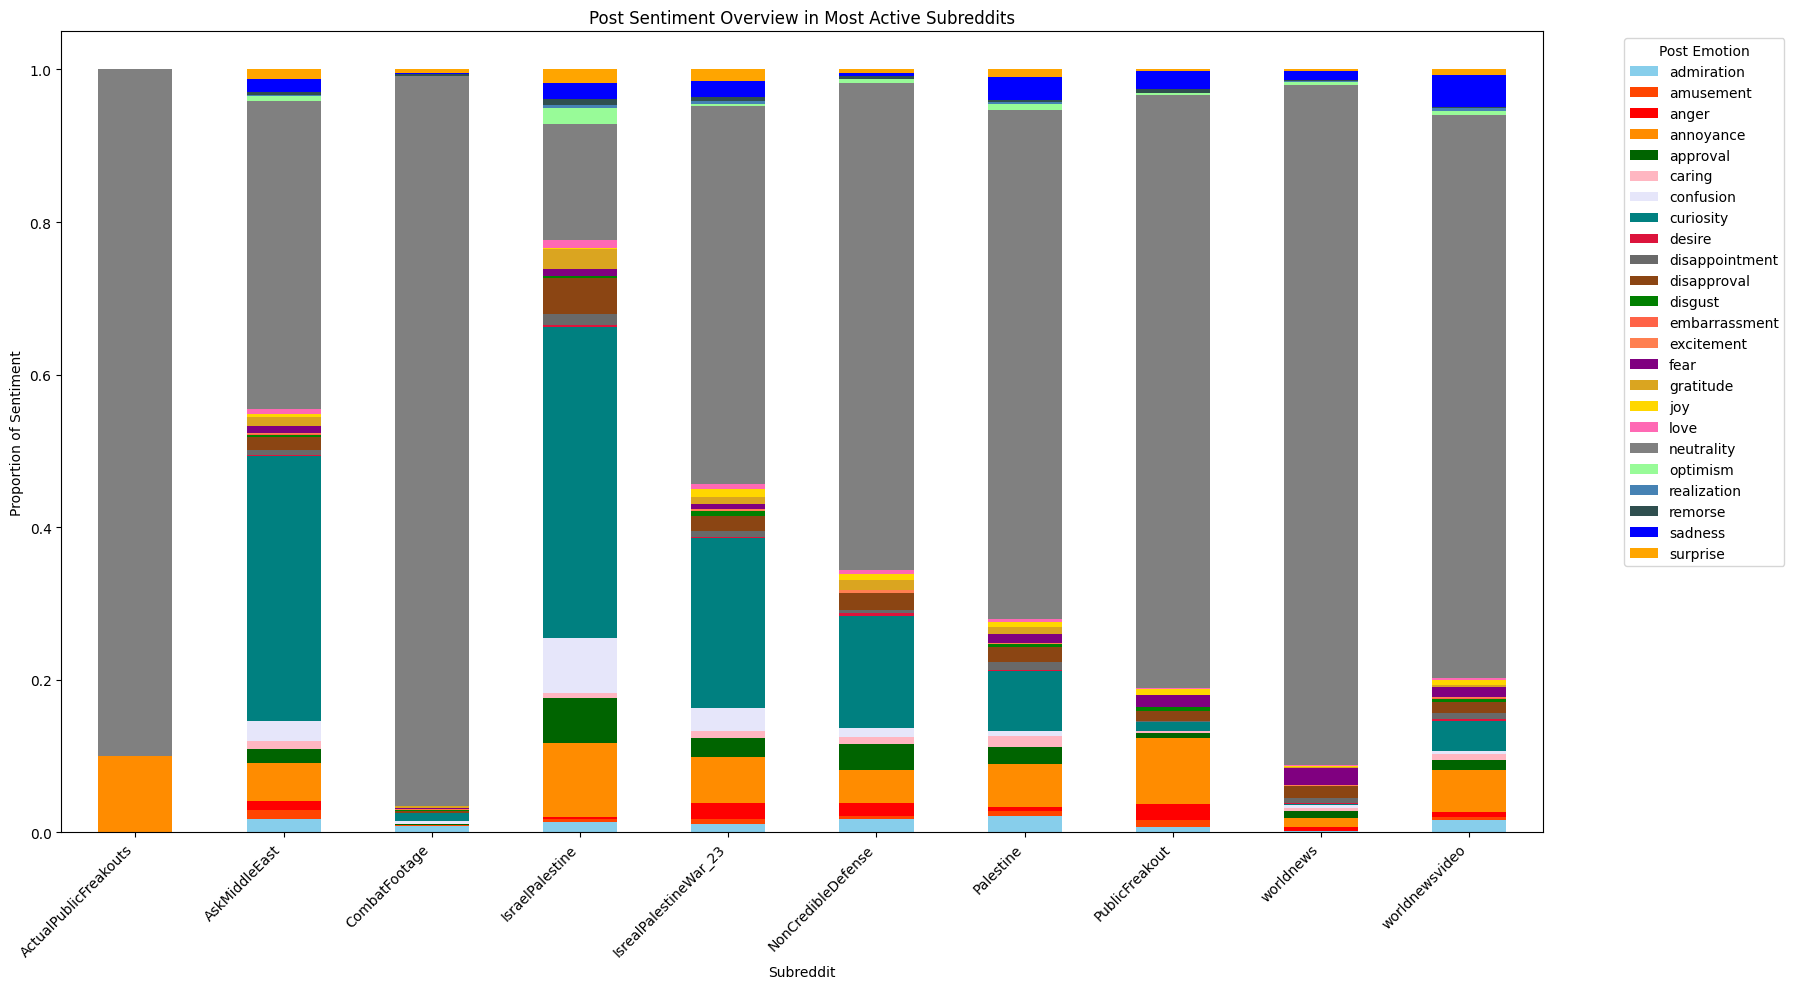

In [15]:
# Identify the most active subreddits
active_subreddits = reddit_comments['subreddit'].value_counts().nlargest(10).index
filtered_df = reddit_comments[reddit_comments['subreddit'].isin(active_subreddits)]

# Group by post_id and then extract the first occurrence of subreddit and post_emotion
unique_posts_subreddits = filtered_df.groupby('post_id').agg({
    'subreddit': 'first',
    'post_emotion': 'first'
})

# Aggregate sentiment data within the most active subreddits
subreddit_sentiment = unique_posts_subreddits.groupby(['subreddit', 'post_emotion']).size().unstack(fill_value=0)

# Normalize to get proportions
subreddit_sentiment = subreddit_sentiment.apply(lambda x: x / x.sum(), axis=1)

# Plot sentiment overview across subreddits using the custom palette
plt.figure(figsize=(18, 10))  
subreddit_sentiment.plot(kind='bar', stacked=True, color=custom_palette, figsize=(18, 10))

plt.title('Post Sentiment Overview in Most Active Subreddits')
plt.ylabel('Proportion of Sentiment')
plt.xlabel('Subreddit')
plt.xticks(rotation=45, ha='right')

# Move the legend outside the plot
plt.legend(title='Post Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1800x1000 with 0 Axes>

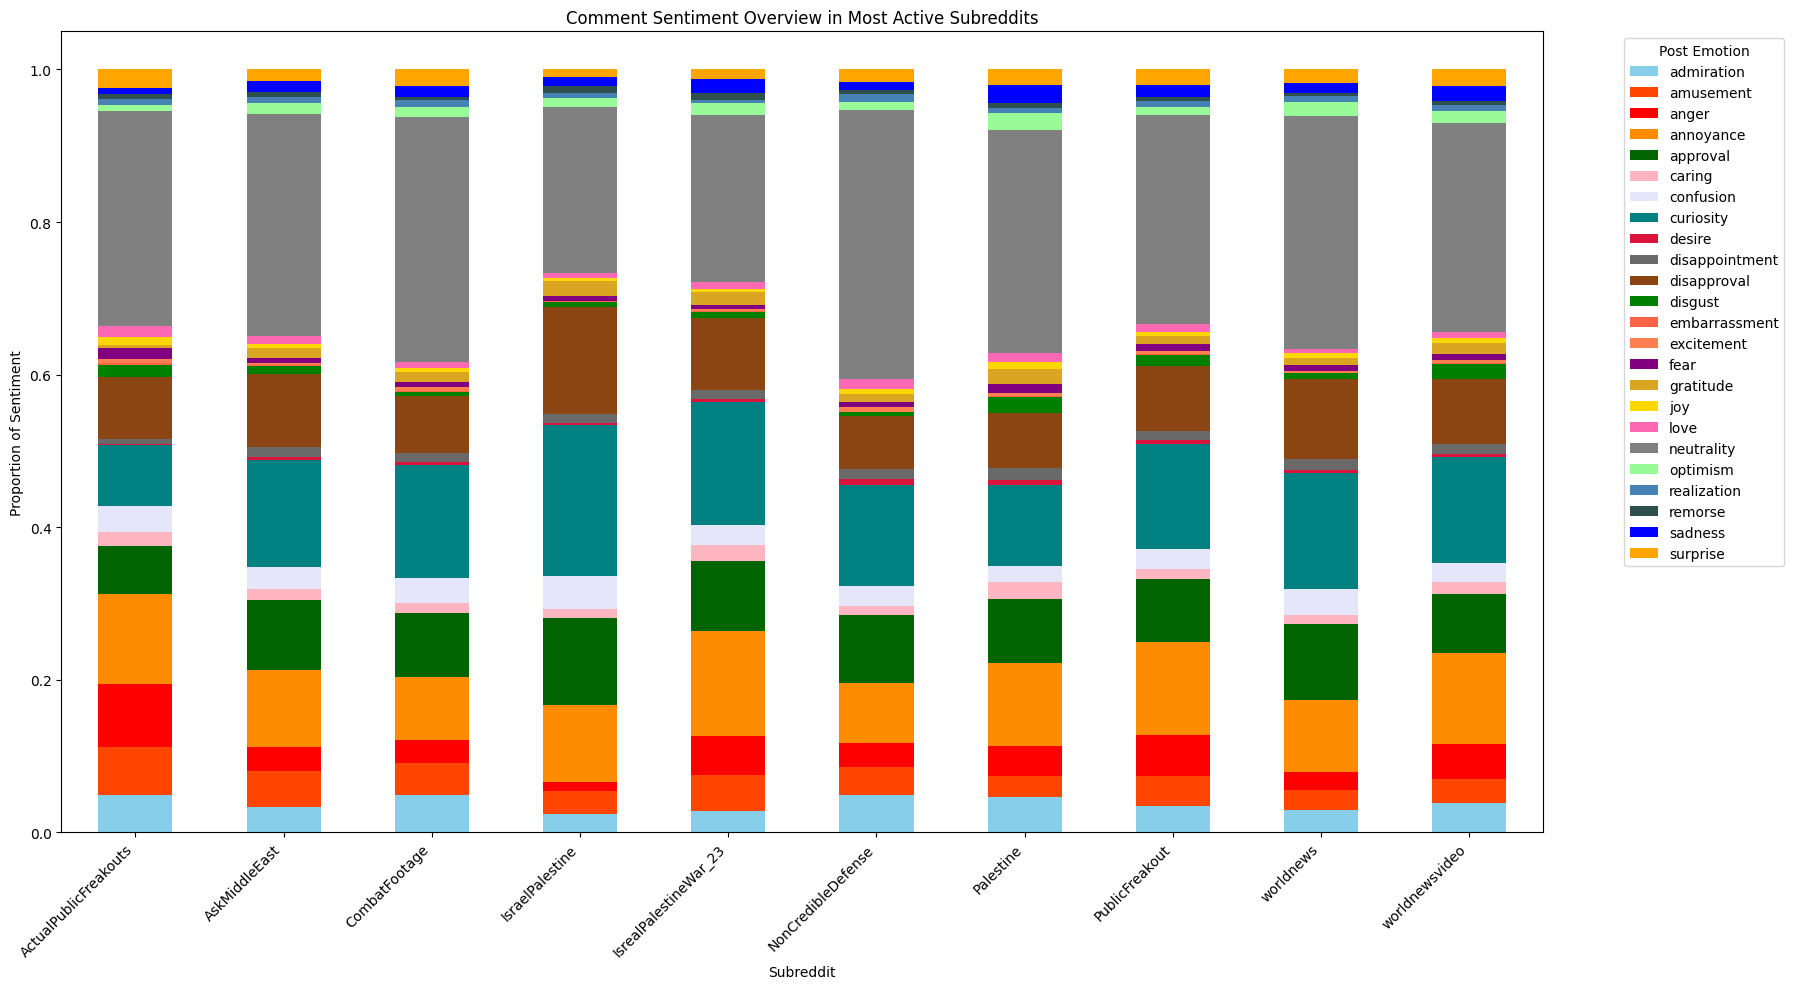

In [72]:
# Identify the most active subreddits
active_subreddits = reddit_comments['subreddit'].value_counts().nlargest(10).index
filtered_df = reddit_comments[reddit_comments['subreddit'].isin(active_subreddits)]

# Aggregate sentiment data within the most active subreddits
subreddit_sentiment = filtered_df.groupby(['subreddit', 'comment_emotion']).size().unstack(fill_value=0)
subreddit_sentiment = subreddit_sentiment.apply(lambda x: x / x.sum(), axis=1)  # Normalize to get proportions

# Plot sentiment overview across subreddits using the custom palette
plt.figure(figsize=(18, 10))  # Increased figure size
subreddit_sentiment.plot(kind='bar', stacked=True, color=custom_palette, figsize=(18, 10))

plt.title('Comment Sentiment Overview in Most Active Subreddits')
plt.ylabel('Proportion of Sentiment')
plt.xlabel('Subreddit')
plt.xticks(rotation=45, ha='right')

# Move the legend outside the plot
plt.legend(title='Post Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Post and Comment Correlation

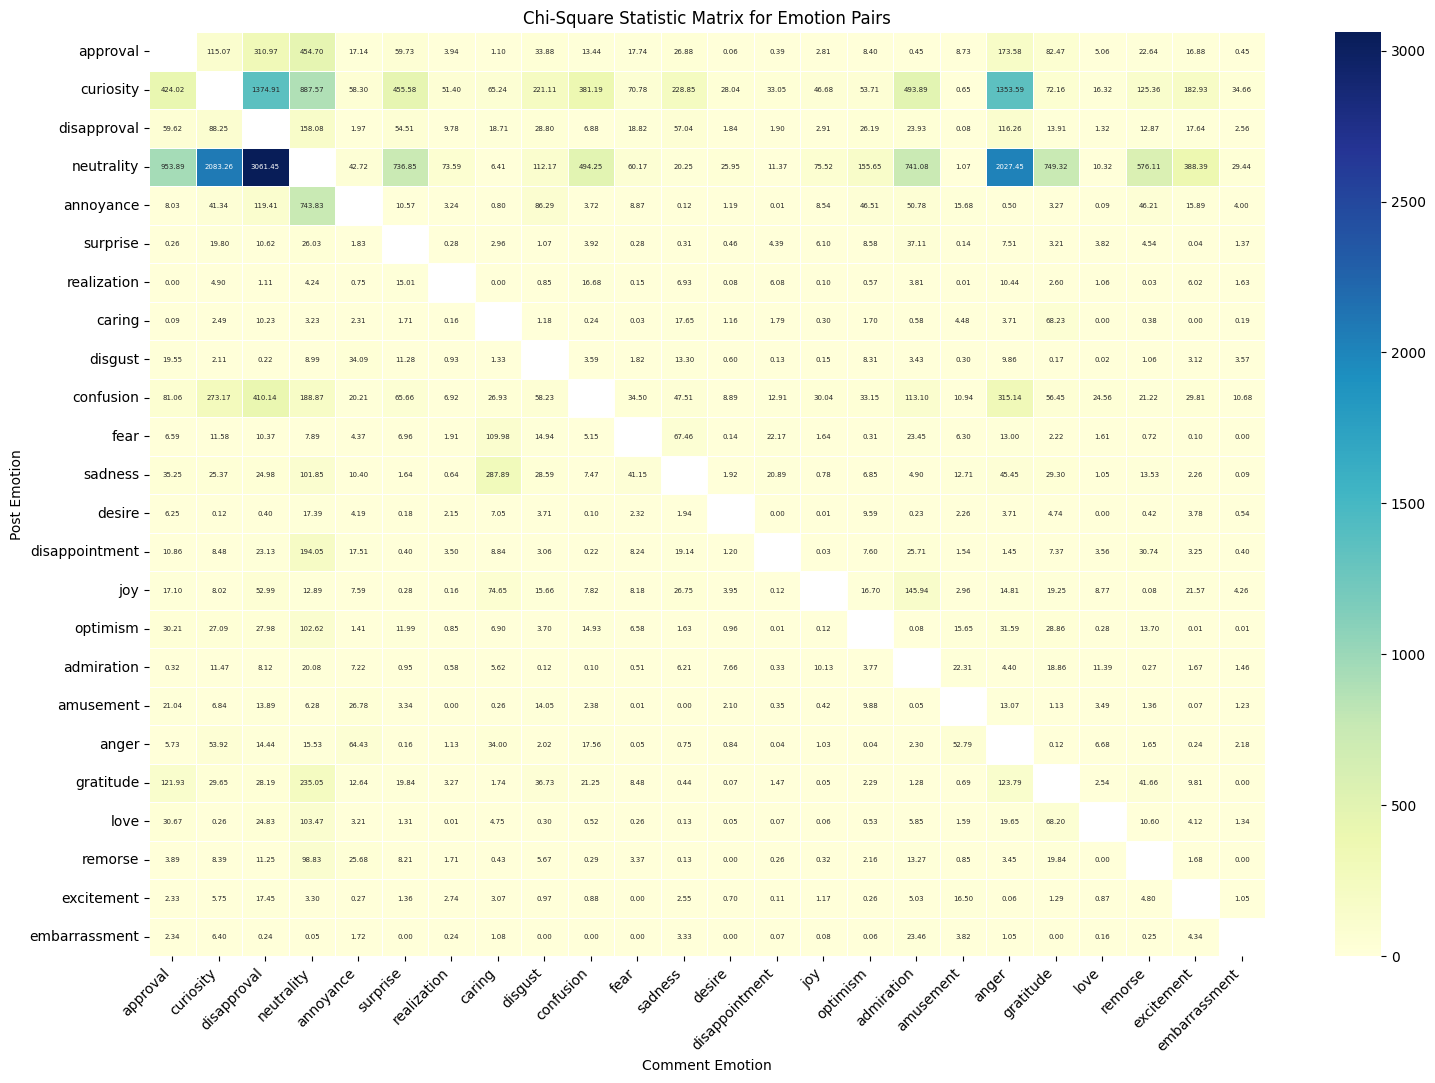

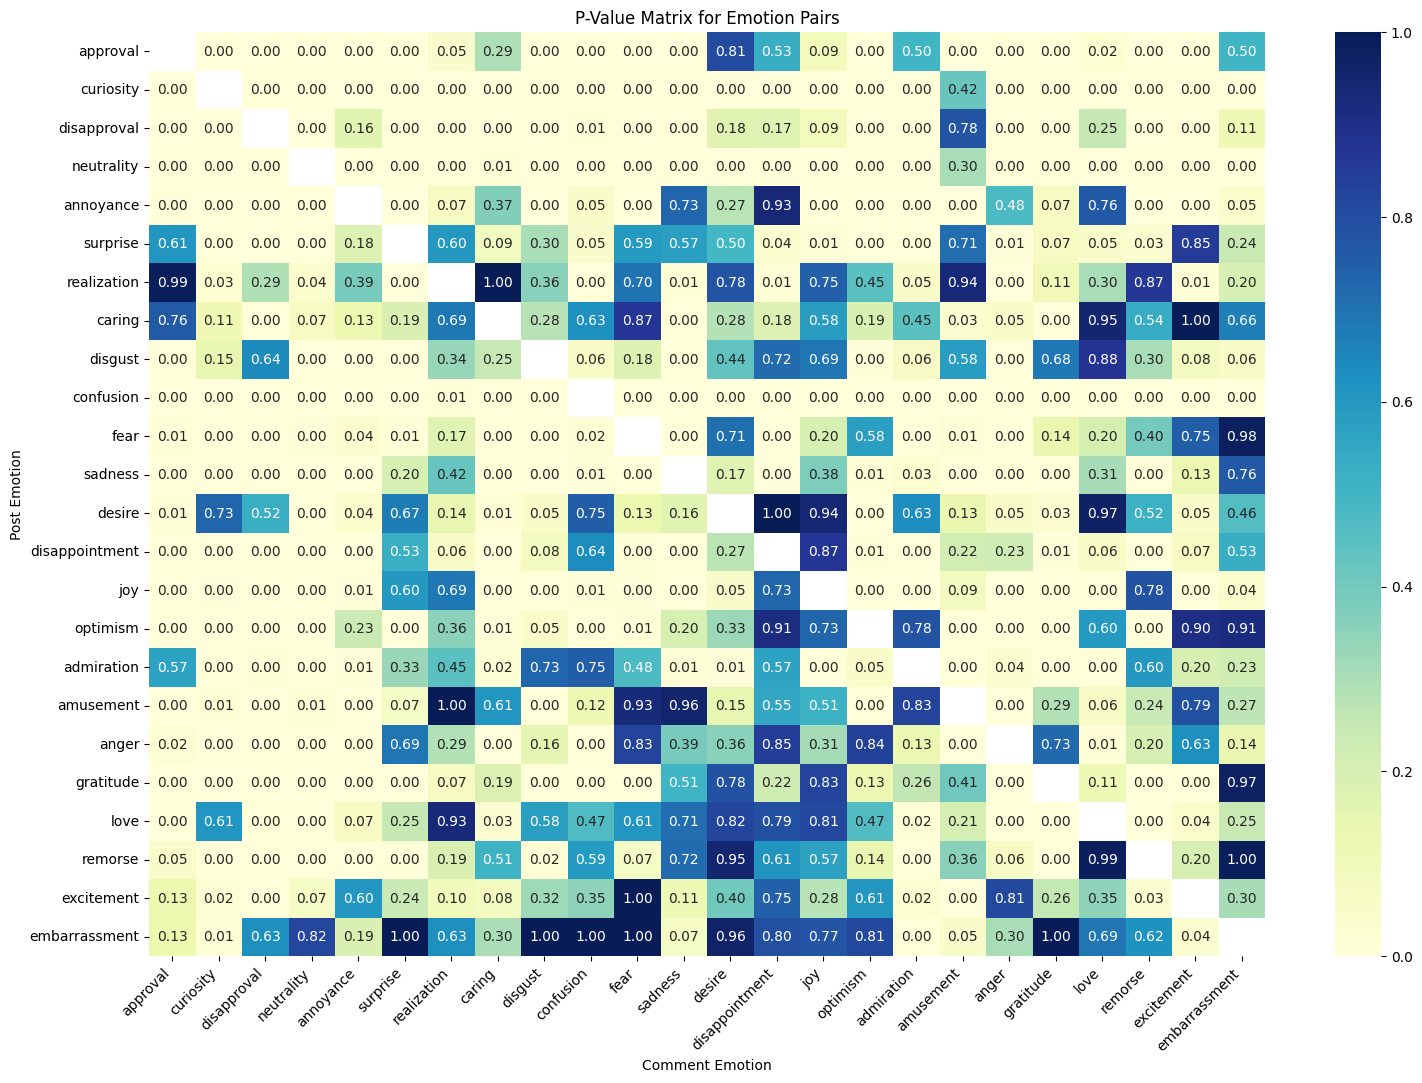

In [19]:
# List of unique emotions
emotions = reddit_comments['post_emotion'].unique()

# Initialize matrices to store Chi-Square statistics and p-values
chi2_matrix = pd.DataFrame(index=emotions, columns=emotions)
p_value_matrix = pd.DataFrame(index=emotions, columns=emotions)

# Calculate Chi-Square statistic and p-value for each pair of emotions
for emotion1 in emotions:
    for emotion2 in emotions:
        if emotion1 == emotion2:
            chi2_matrix.loc[emotion1, emotion2] = np.nan  # No need to calculate for identical emotions
            p_value_matrix.loc[emotion1, emotion2] = np.nan
        else:
            # Create a contingency table for the pair of emotions
            contingency_table = pd.crosstab(reddit_comments['post_emotion'] == emotion1,
                                            reddit_comments['comment_emotion'] == emotion2)
            
            # Perform Chi-Square Test
            chi2, p, _, _ = chi2_contingency(contingency_table)
            
            # Store the results in the matrices
            chi2_matrix.loc[emotion1, emotion2] = chi2
            p_value_matrix.loc[emotion1, emotion2] = p

# Convert the results to numeric format
chi2_matrix = chi2_matrix.apply(pd.to_numeric)
p_value_matrix = p_value_matrix.apply(pd.to_numeric)

# Plot the Chi-Square statistic matrix with improved clarity
plt.figure(figsize=(18, 12))  # Increase figure size
sns.heatmap(chi2_matrix, annot=True, cmap="YlGnBu", fmt=".2f", annot_kws={"size": 5}, linewidths=.5)  # Reduced font size
plt.title('Chi-Square Statistic Matrix for Emotion Pairs')
plt.xlabel('Comment Emotion')
plt.ylabel('Post Emotion')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Plot the p-value matrix
plt.figure(figsize=(18, 12))
sns.heatmap(p_value_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('P-Value Matrix for Emotion Pairs')
plt.xlabel('Comment Emotion')
plt.ylabel('Post Emotion')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()




# Article Source Analysis

## Overall Article Sources

In [90]:
# Filter the DataFrame to include only articles
articles_df = reddit_comments[reddit_comments['sub_category'] == 'article']

# Identify the top 30 most frequent sources from articles
top_30_article_sources = articles_df['source'].value_counts().nlargest(30)


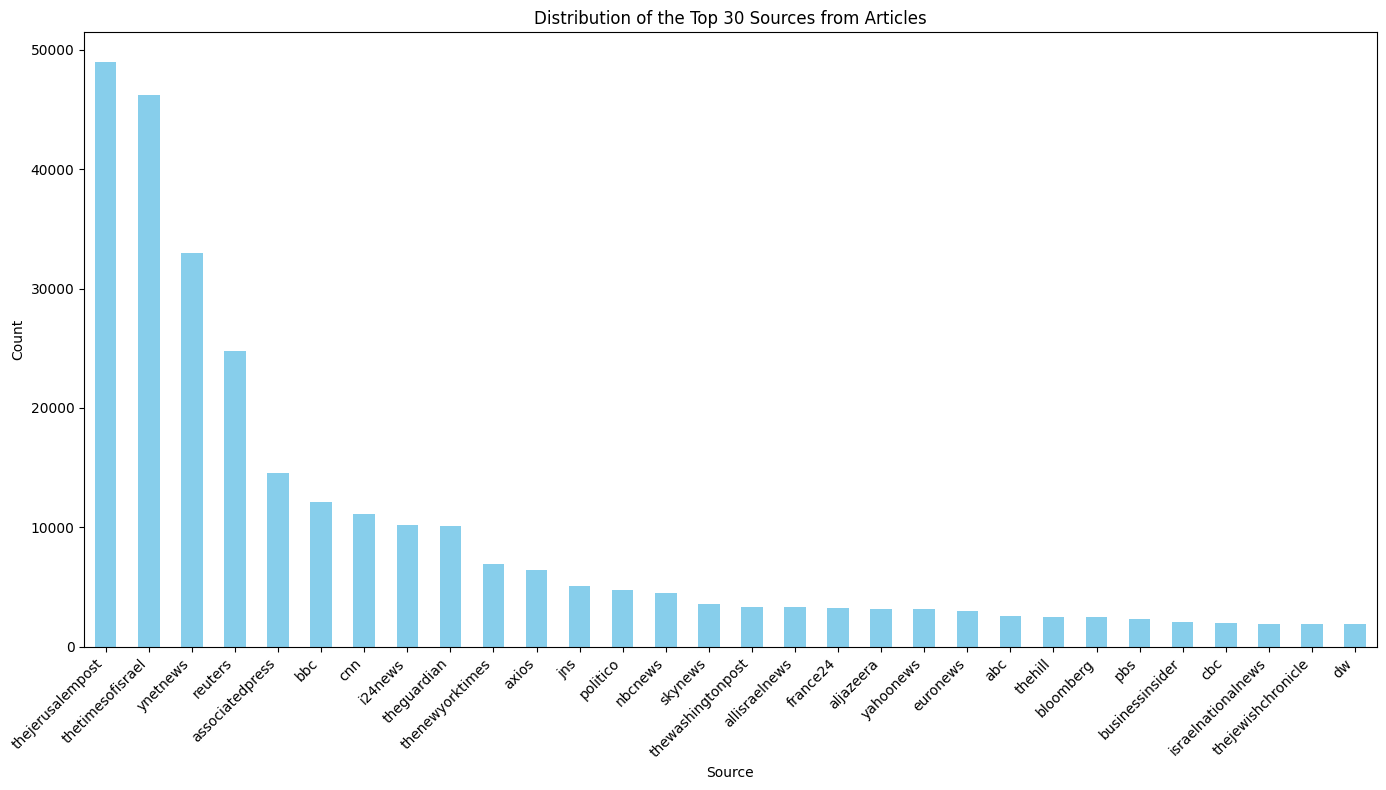

In [91]:
import matplotlib.pyplot as plt

# Plot the distribution of the top 30 sources from articles
plt.figure(figsize=(14, 8))
top_30_article_sources.plot(kind='bar', color='skyblue')

plt.title('Distribution of the Top 30 Sources from Articles')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Now The Average post_score 

In [122]:
# Count the number of unique post_id for each source
source_unique_post_counts = articles_df.groupby('source')['post_id'].nunique()

# Filter sources that have 30 or more unique posts
sources_with_30_or_more_unique_posts = source_unique_post_counts[source_unique_post_counts >= 30].index

# Filter the articles DataFrame to include only the sources with 30 or more unique posts
filtered_articles_df = articles_df[articles_df['source'].isin(sources_with_30_or_more_unique_posts)]

# Calculate the average post score for these filtered sources
source_avg_post_score = filtered_articles_df.groupby('source')['post_score'].mean()

# Identify the top 30 sources by average post score
top_30_sources_by_avg_post_score = source_avg_post_score.nlargest(30)


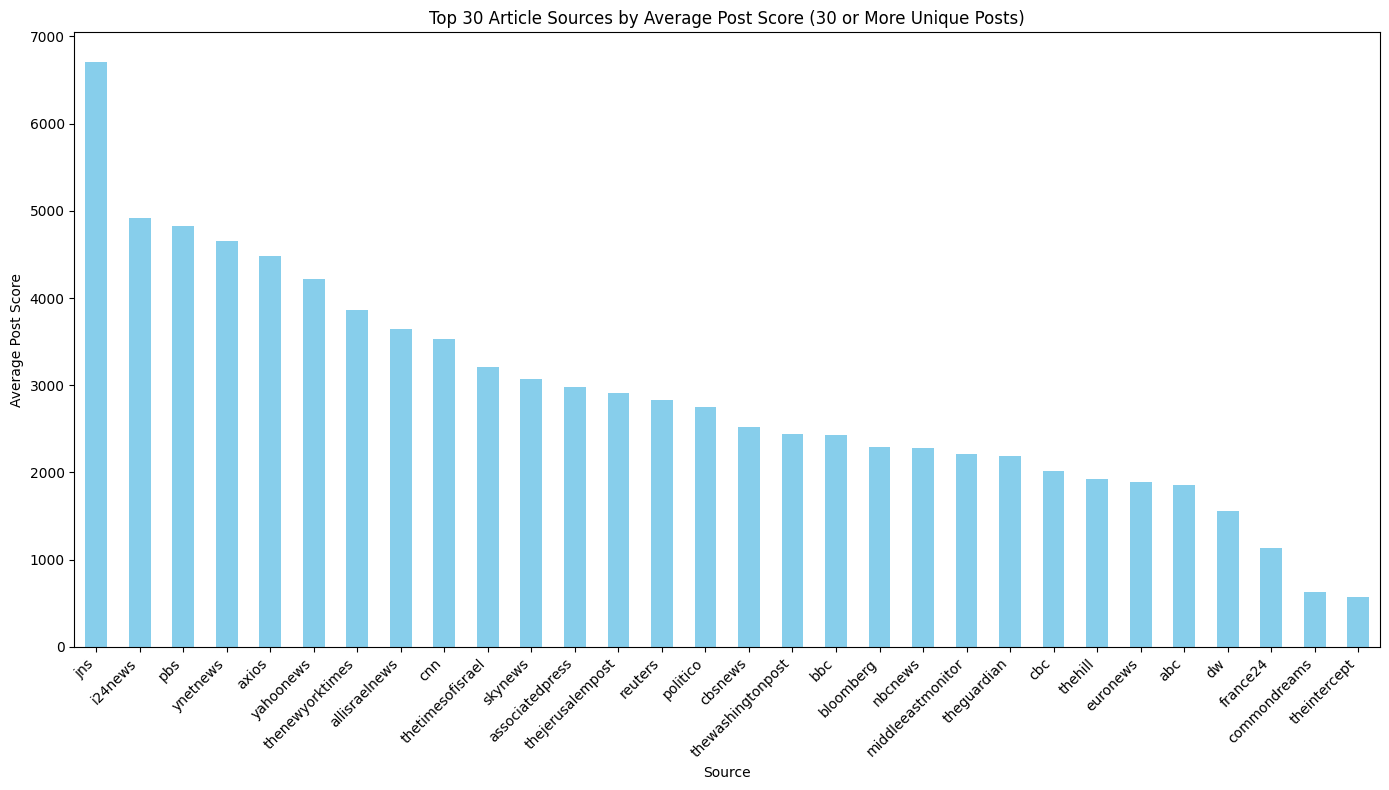

In [123]:
import matplotlib.pyplot as plt

# Plot the bar chart for the top 30 sources by average post score
plt.figure(figsize=(14, 8))
top_30_sources_by_avg_post_score.sort_values(ascending=False).plot(kind='bar', color='skyblue')

plt.title('Top 30 Article Sources by Average Post Score (30 or More Unique Posts)')
plt.xlabel('Source')
plt.ylabel('Average Post Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## By Subreddit

In [92]:
# Get a list of all unique subreddits
unique_subreddits = reddit_comments['subreddit'].unique()


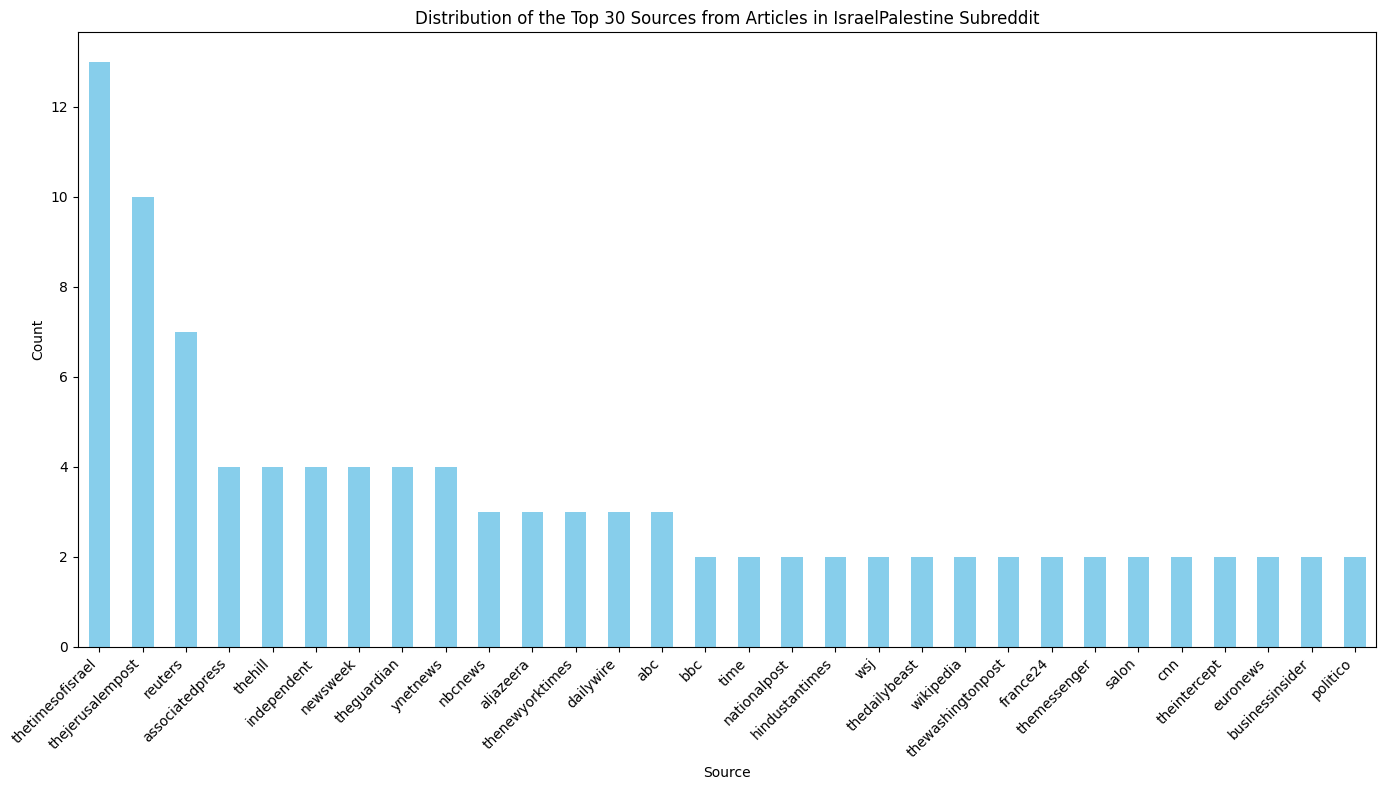

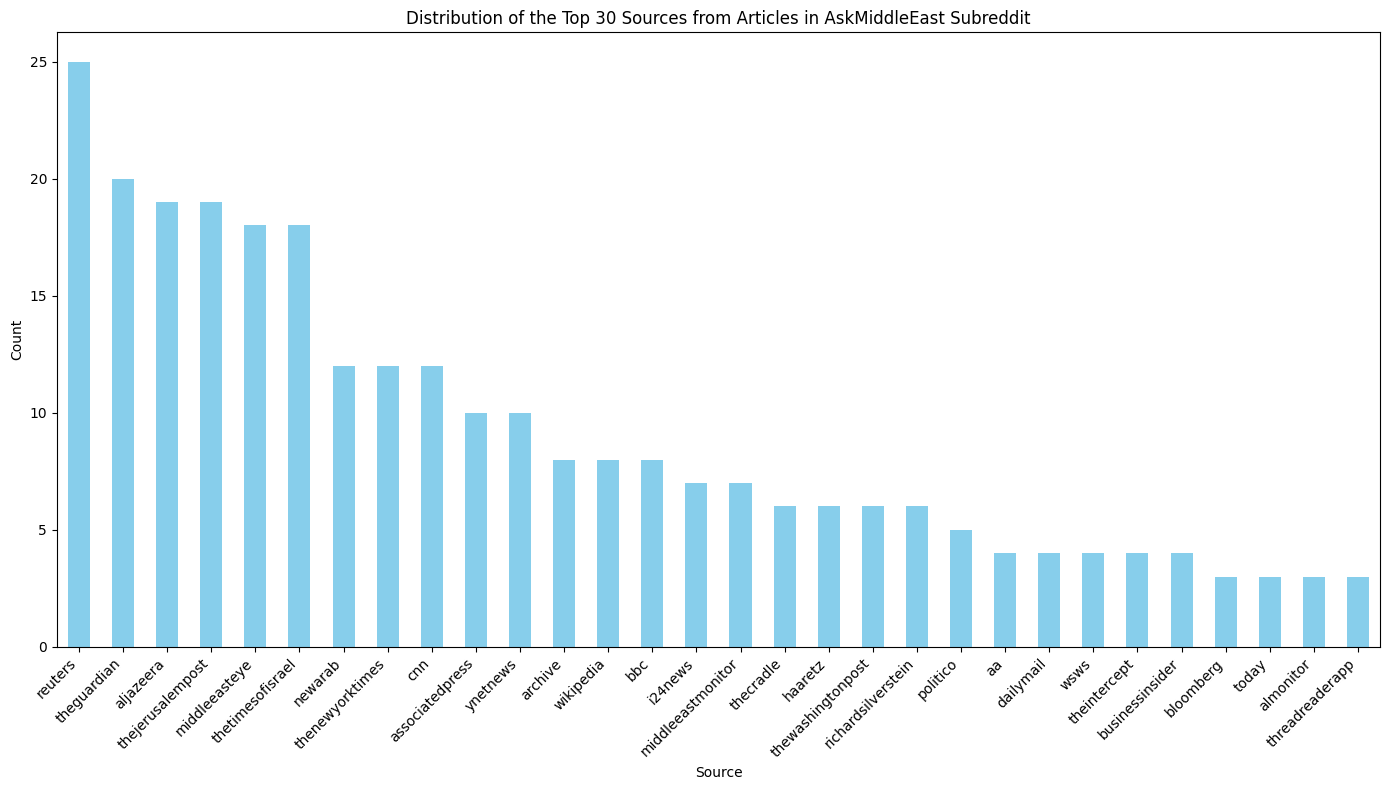

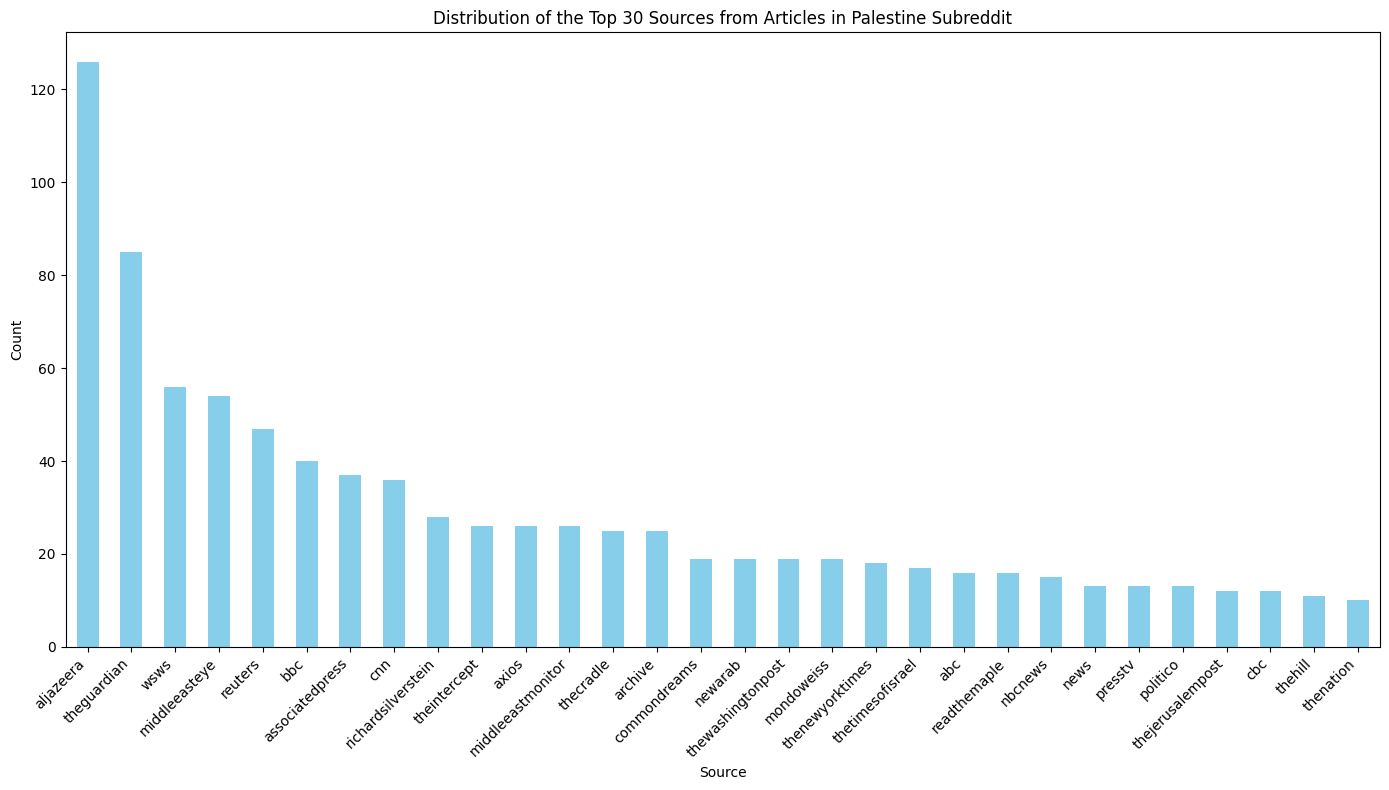

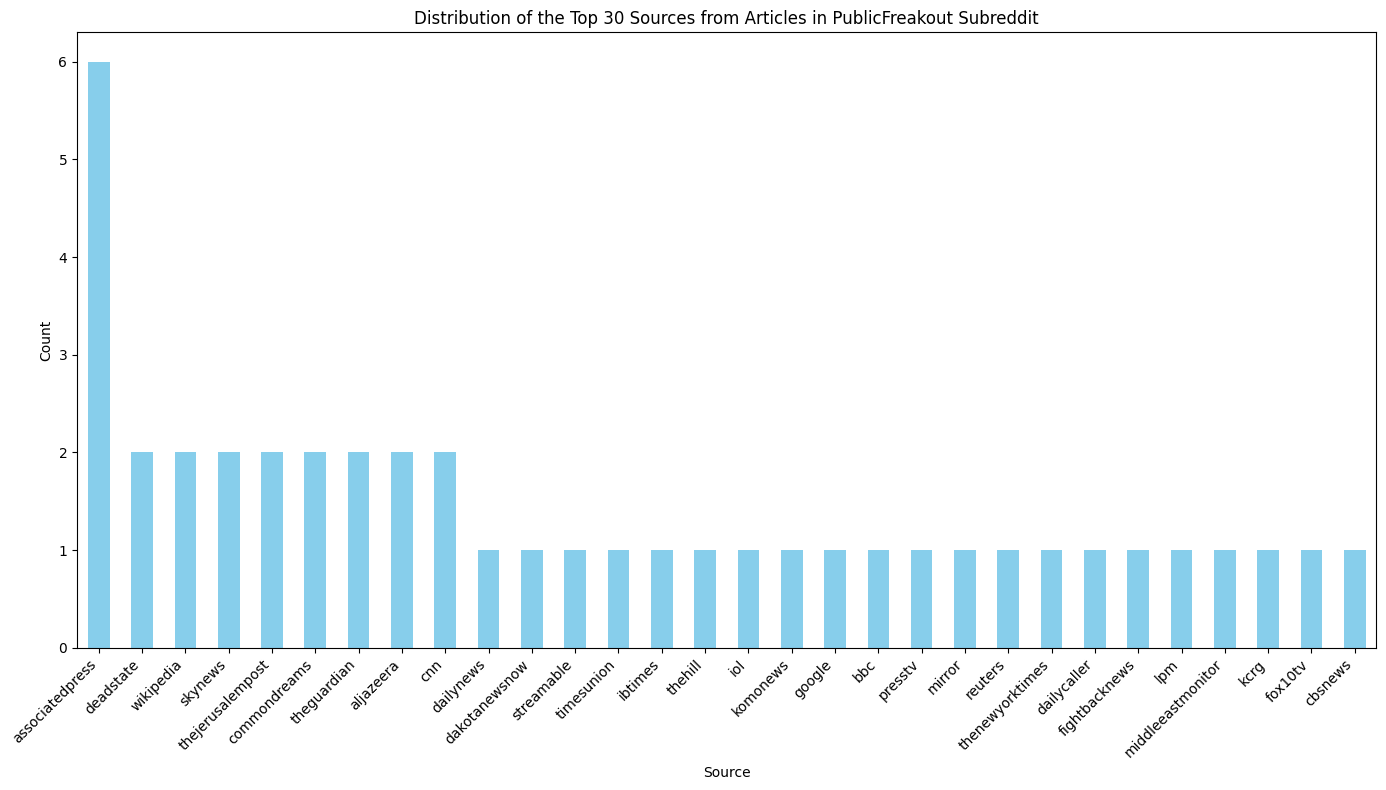

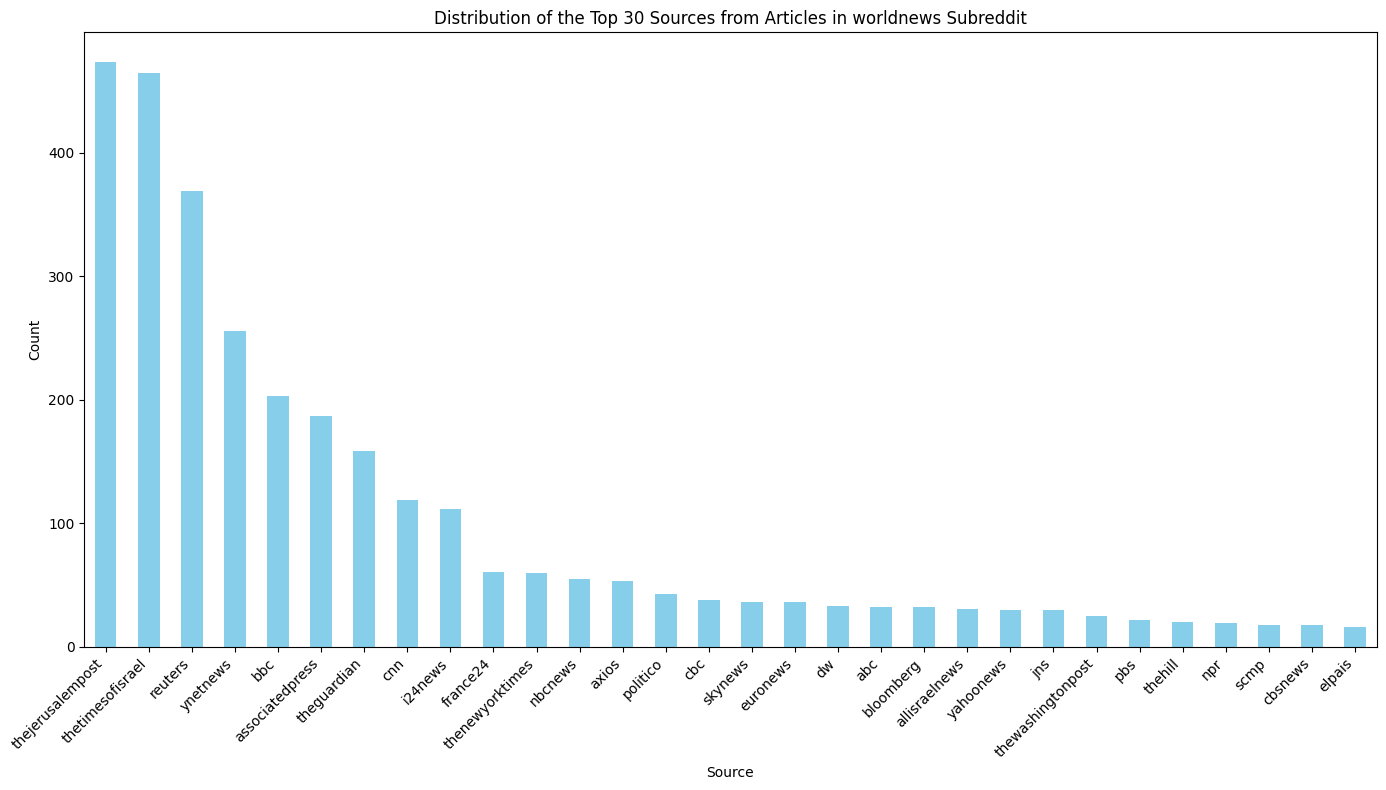

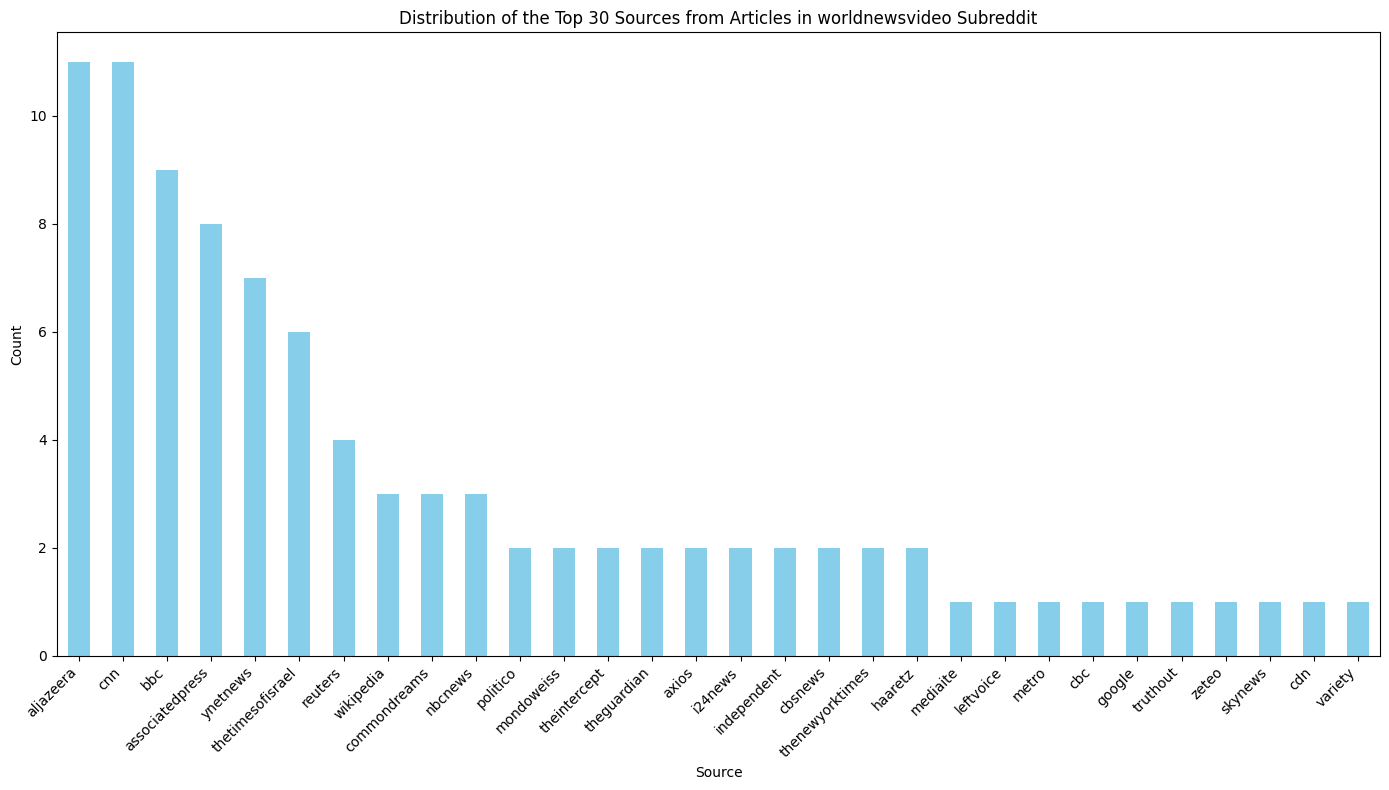

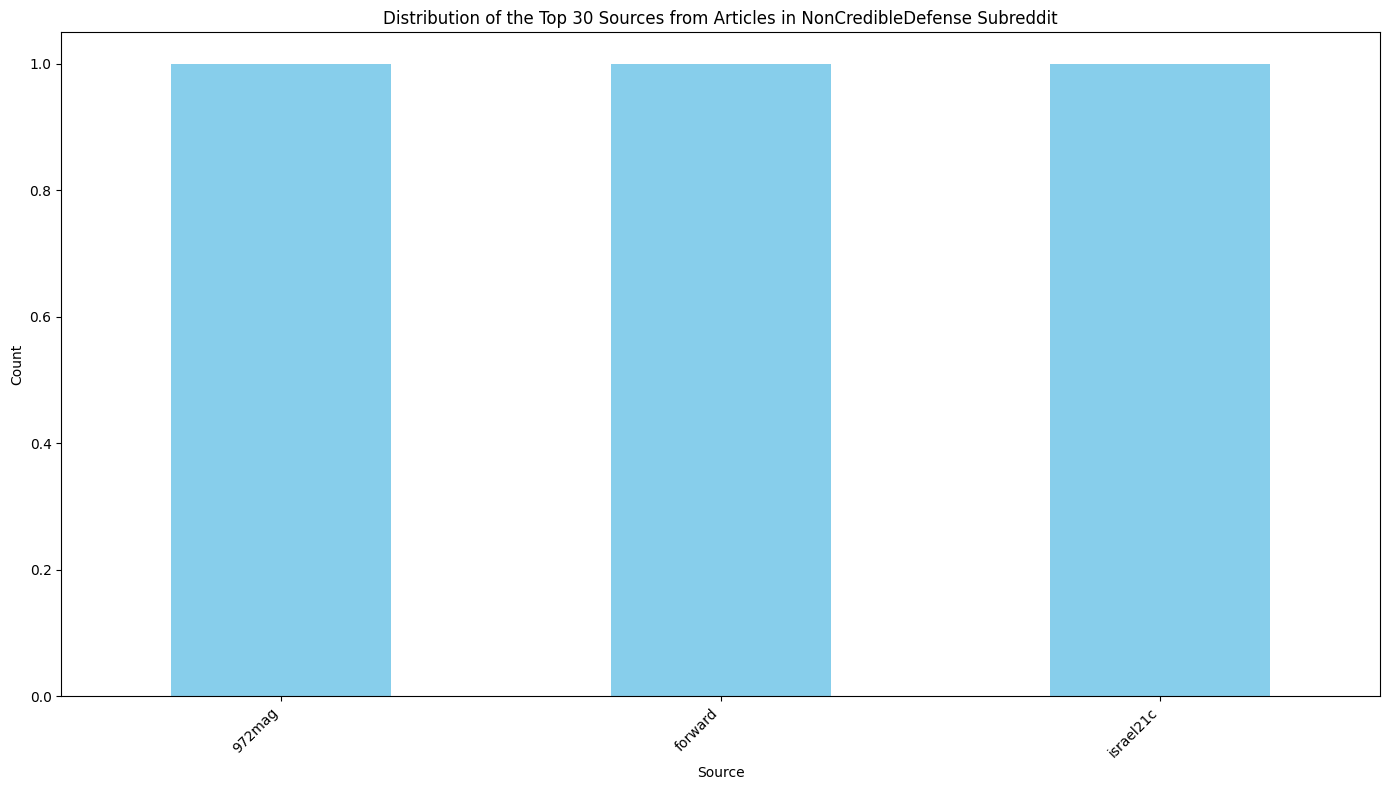

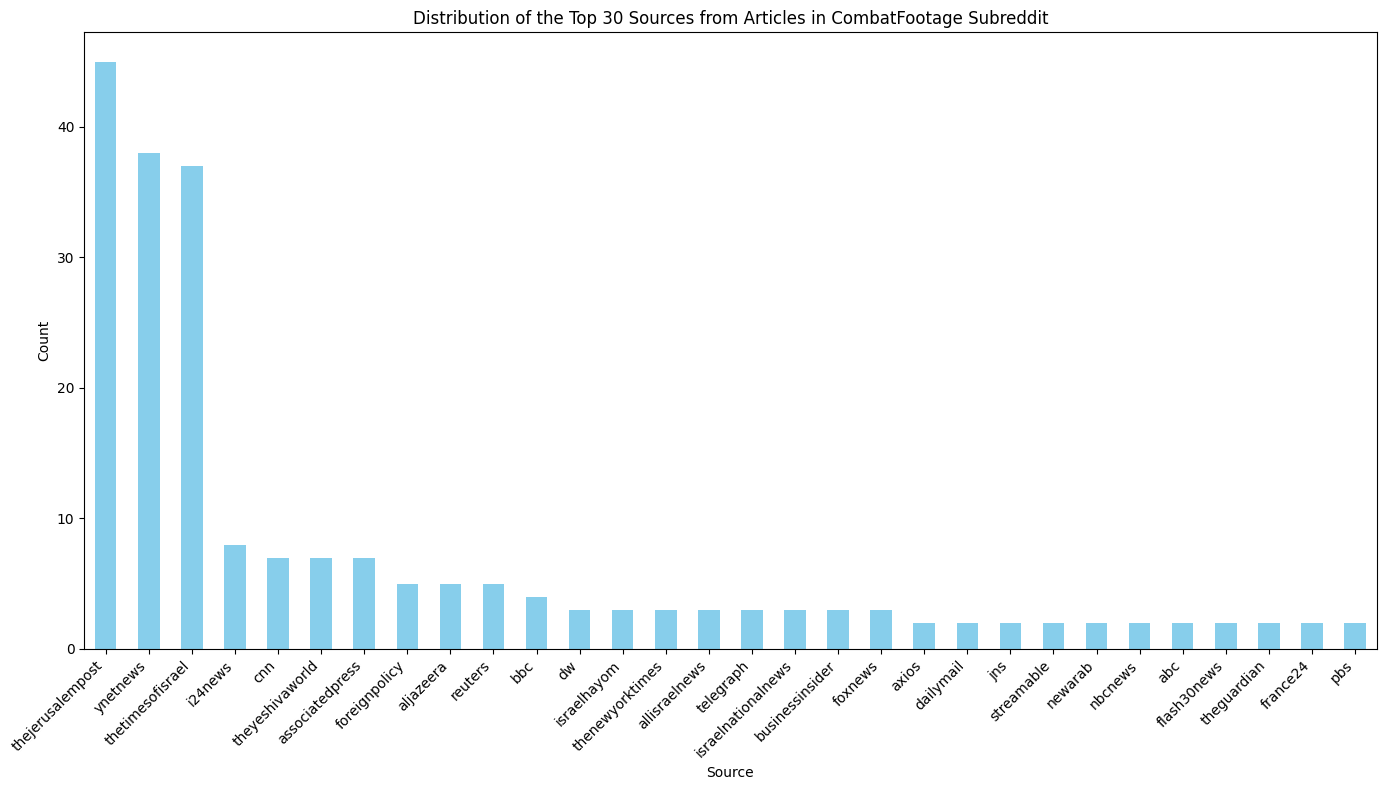

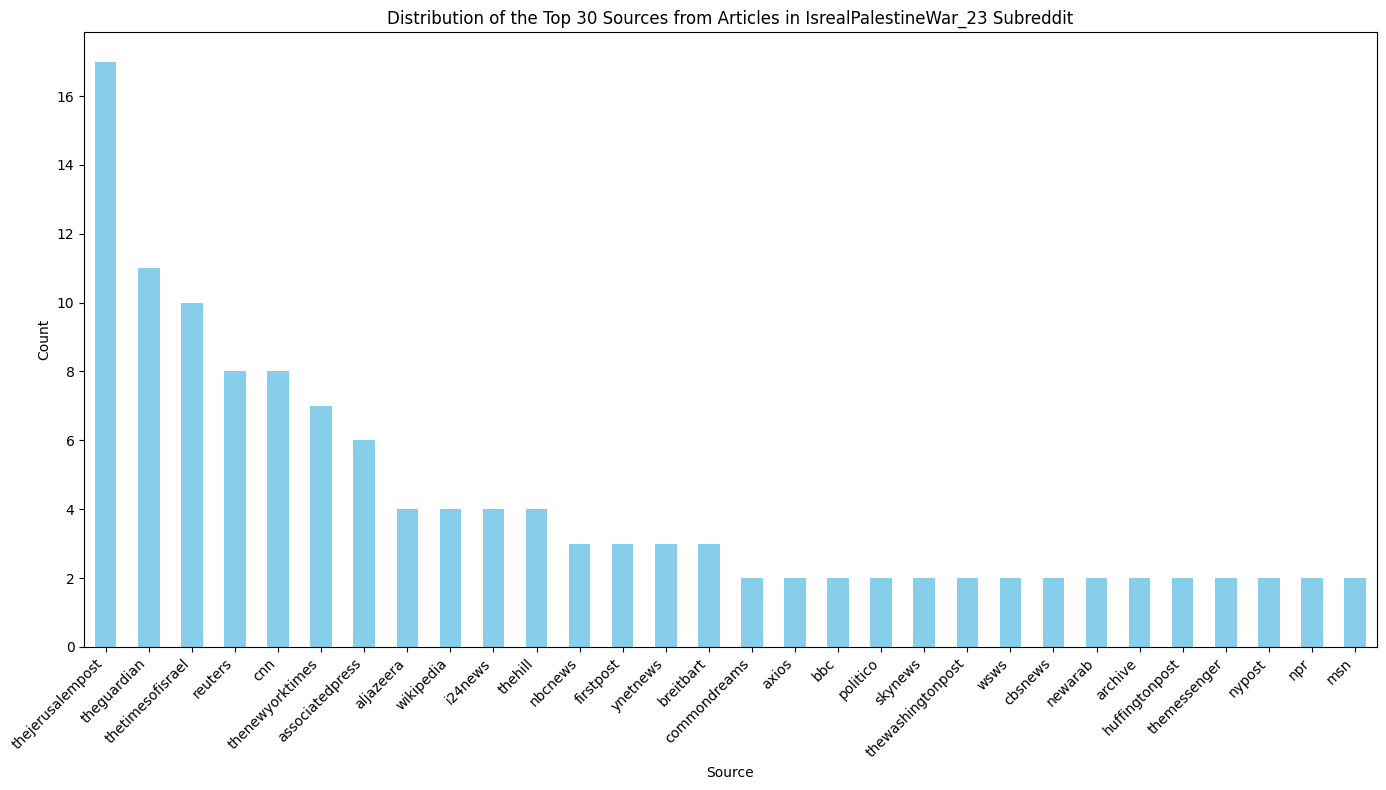

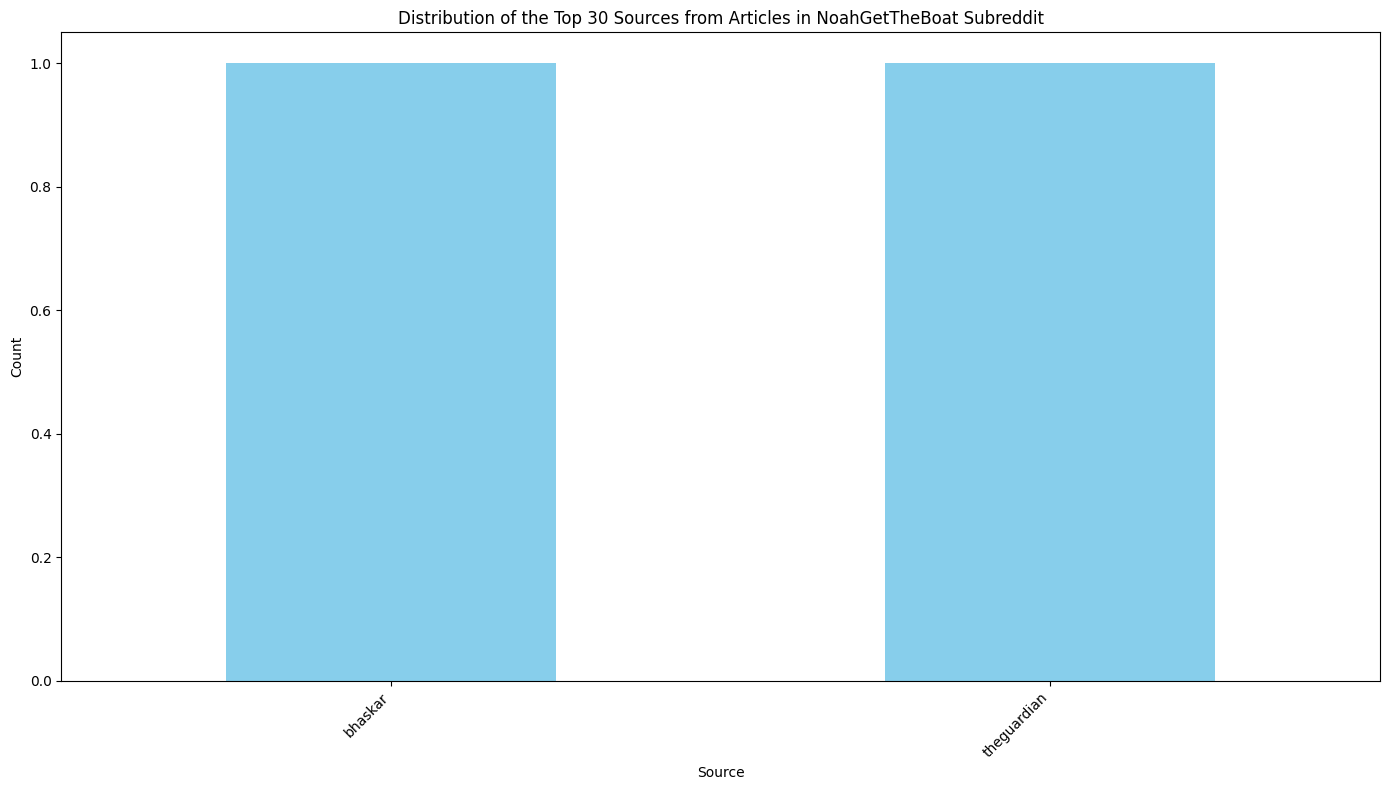

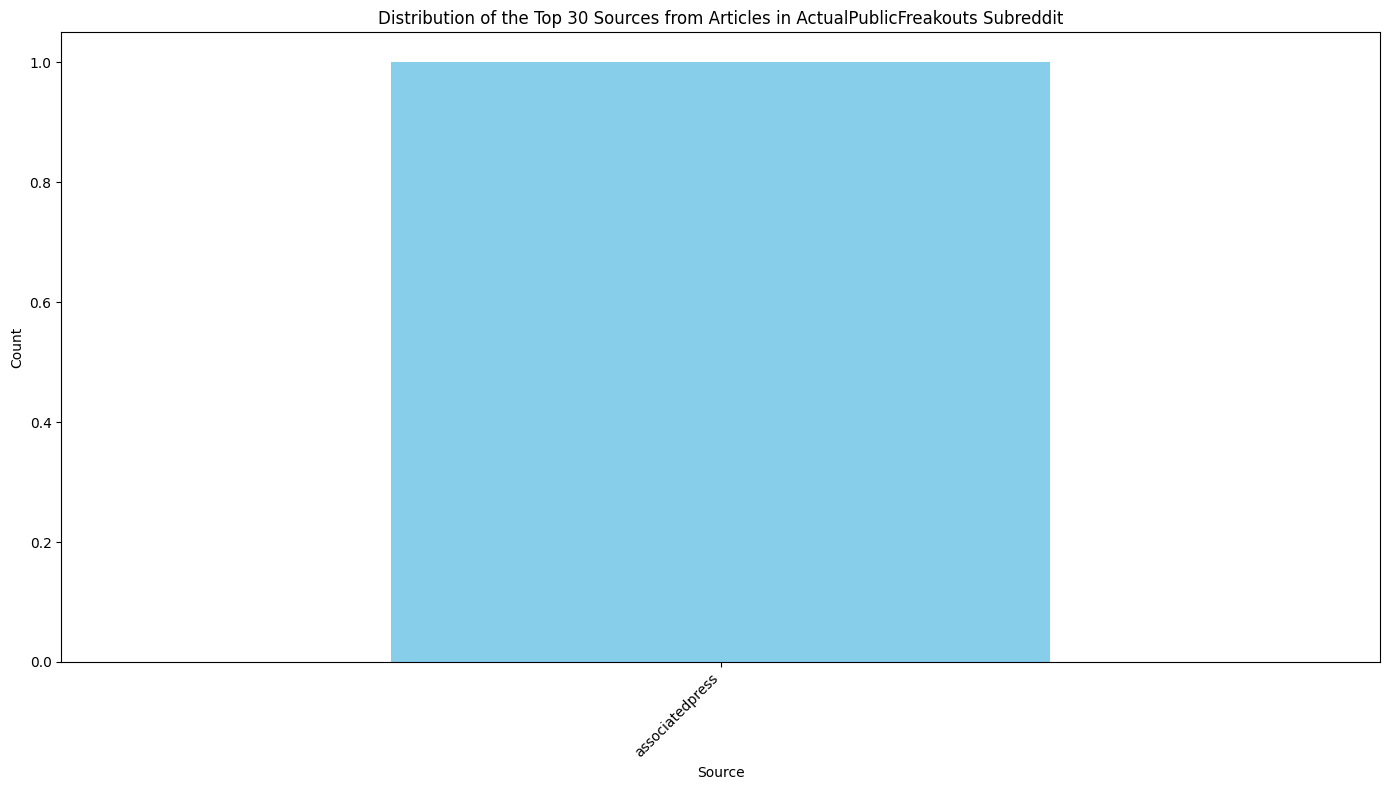

In [63]:
# Loop through each subreddit
for subreddit in unique_subreddits:
    # Filter the DataFrame for the current subreddit and articles
    subreddit_articles_df = reddit_comments[(reddit_comments['subreddit'] == subreddit) & (reddit_comments['sub_category'] == 'article')]
    
    # Ensure uniqueness by post_id
    subreddit_articles_df = subreddit_articles_df.drop_duplicates(subset='post_id')
    
    # Identify the top 30 most frequent sources from articles in this subreddit
    top_30_article_sources = subreddit_articles_df['source'].value_counts().nlargest(30)
    
    # Plot the distribution of the top 30 sources from articles in this subreddit
    if not top_30_article_sources.empty:  # Only plot if there are sources to show
        plt.figure(figsize=(14, 8))
        top_30_article_sources.plot(kind='bar', color='skyblue')

        plt.title(f'Distribution of the Top 30 Sources from Articles in {subreddit} Subreddit')
        plt.xlabel('Source')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


# Comment Length

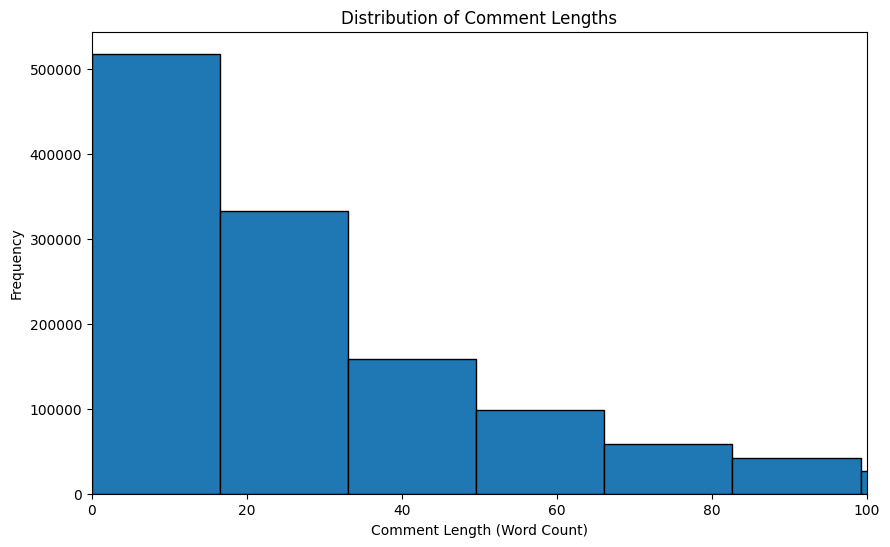

In [33]:
import matplotlib.pyplot as plt

# Convert all entries in 'self_text' to strings to handle NaN and non-string values
reddit_comments['self_text'] = reddit_comments['self_text'].fillna('').astype(str)

# Calculate the word count of each comment
reddit_comments['comment_length'] = reddit_comments['self_text'].str.split().apply(len)

# Plotting the distribution of comment lengths
plt.figure(figsize=(10, 6))
plt.hist(reddit_comments['comment_length'], bins=100, edgecolor='black')
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length (Word Count)')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.show()

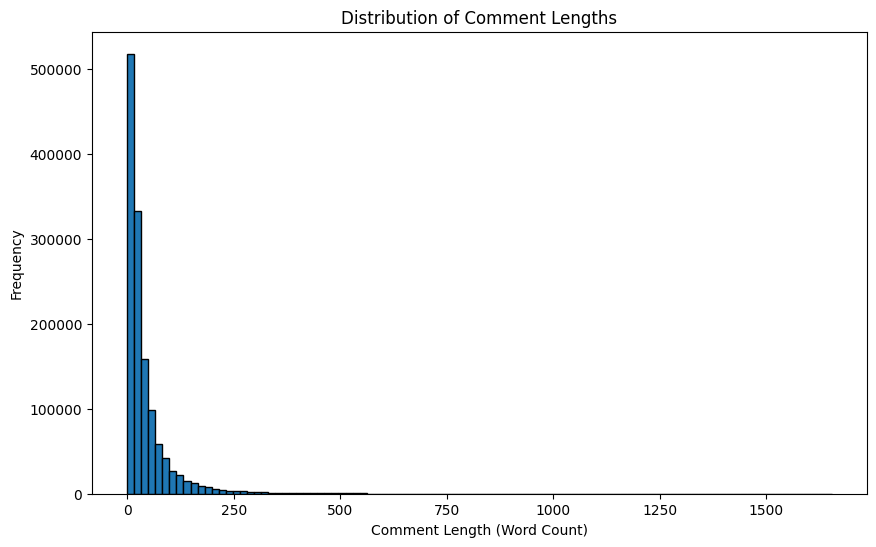

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(reddit_comments['comment_length'], bins=100, edgecolor='black')
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length (Word Count)')
plt.ylabel('Frequency')
plt.show()

# Timezone Analysis

In [186]:
# Convert the timestamp columns to datetime
reddit_comments['post_created_time'] = pd.to_datetime(reddit_comments['post_created_time'])
reddit_comments['created_time'] = pd.to_datetime(reddit_comments['created_time'])

# Extract the hour from the timestamp (this is in UTC)
reddit_comments['post_hour_utc'] = reddit_comments['post_created_time'].dt.hour
reddit_comments['comment_hour_utc'] = reddit_comments['created_time'].dt.hour


In [187]:
# Create a function to map UTC hour to GMT offset
def map_hour_to_gmt_offset(hour):
    if hour >= 12:
        return hour - 24
    else:
        return hour


In [188]:
# Apply the function to map hours to GMT offsets
reddit_comments['post_gmt_offset'] = reddit_comments['post_hour_utc'].apply(map_hour_to_gmt_offset)
reddit_comments['comment_gmt_offset'] = reddit_comments['comment_hour_utc'].apply(map_hour_to_gmt_offset)

# Group by the GMT offset and count the occurrences
post_gmt_offset_counts = reddit_comments['post_gmt_offset'].value_counts().sort_index()
comment_gmt_offset_counts = reddit_comments['comment_gmt_offset'].value_counts().sort_index()


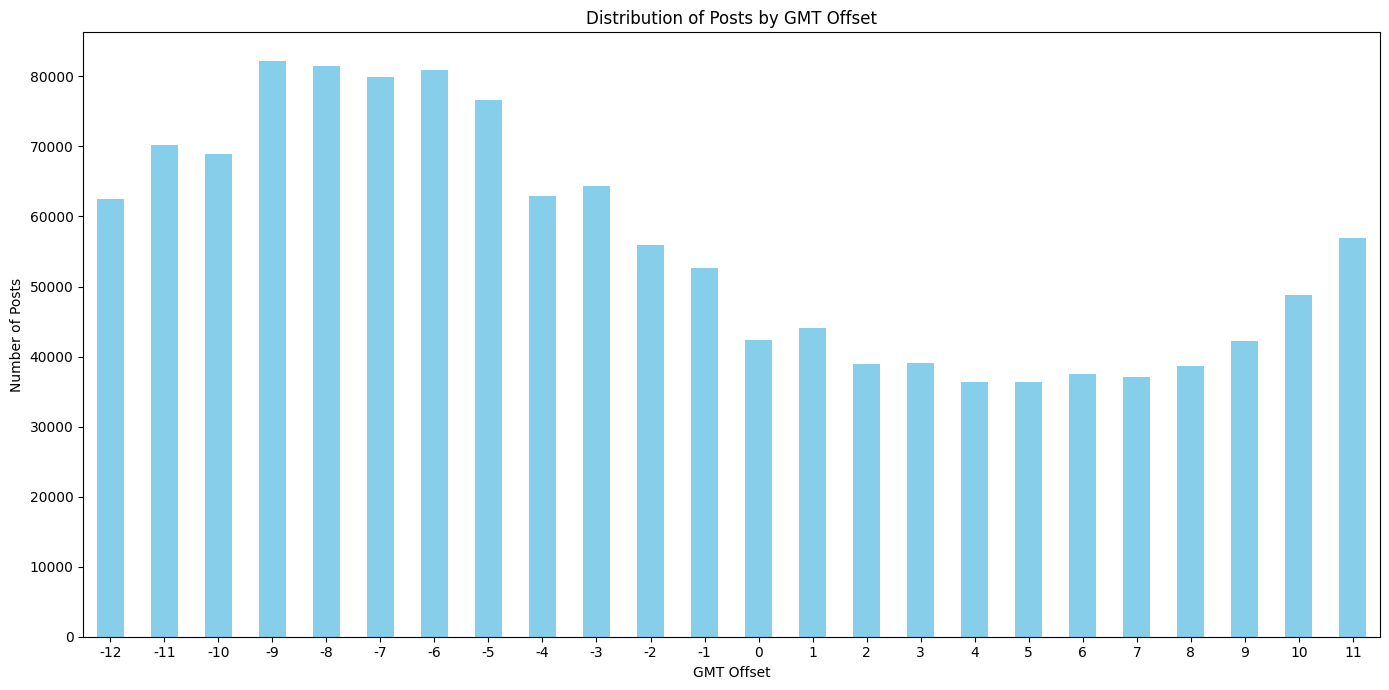

In [189]:
# Plotting the results for posts
plt.figure(figsize=(14, 7))
post_gmt_offset_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Posts by GMT Offset')
plt.xlabel('GMT Offset')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

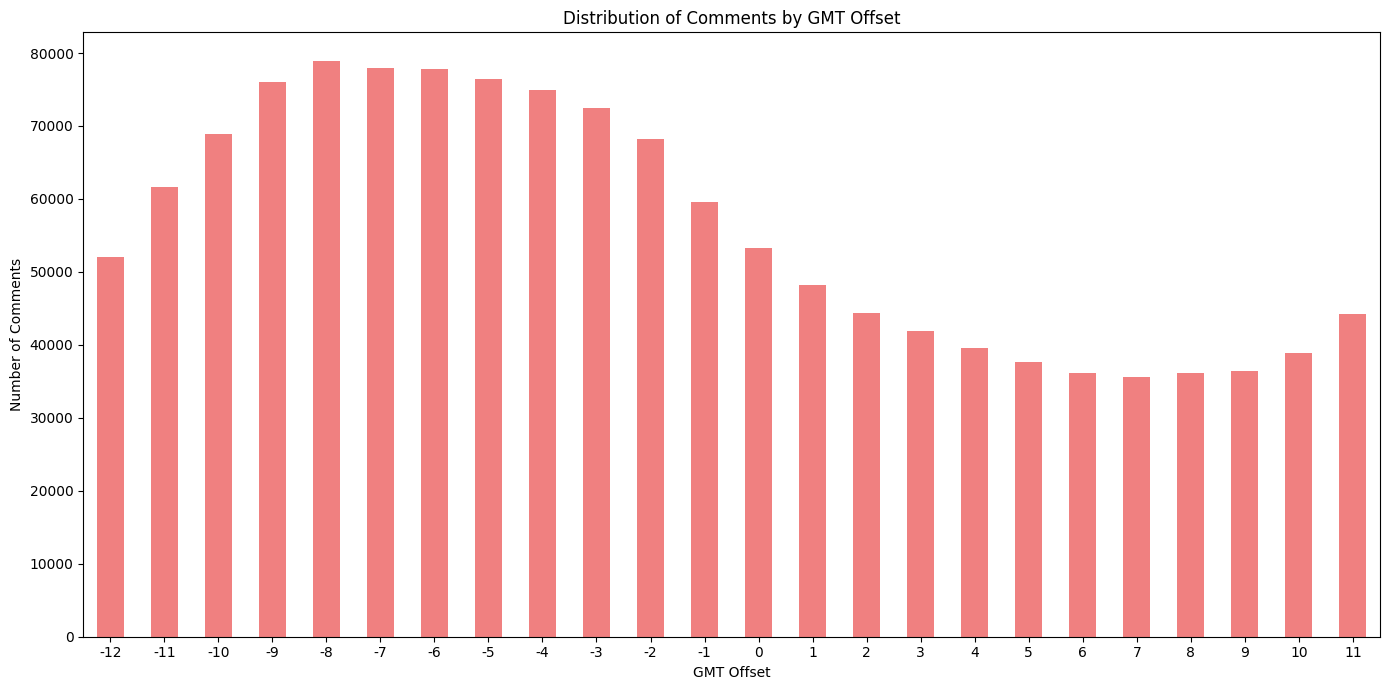

In [190]:
# Plotting the results for comments
plt.figure(figsize=(14, 7))
comment_gmt_offset_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Comments by GMT Offset')
plt.xlabel('GMT Offset')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()